<h1 align=center><font size = 5>Project - Predictive Modeling</font></h1>

_for beter visualisation_

In [1]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

# Problem 1: Linear Regression


_You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important._

_**Data Dictionary:**_

|Variable Name	|Description|
|:----------------------|:-----------|
|Carat|Carat weight of the cubic zirconia.|
|Cut|Describe the cut quality of the cubic zirconia. Quality is increasing order Fair, Good, Very Good, Premium, Ideal.|
|Color|Colour of the cubic zirconia.With D being the worst and J the best.|
|Clarity|cubic zirconia Clarity refers to the absence of the Inclusions and Blemishes.<br>(In order from Best to Worst, IF = flawless, l1= level 1 inclusion) IF, VVS1, VVS2, VS1, VS2, Sl1, Sl2, l1|
|Depth|The Height of cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.|
|Table|The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.|
|Price| the Price of the cubic zirconia.|
|X|Length of the cubic zirconia in mm.|
|Y|Width of the cubic zirconia in mm.|
|Z|Height of the cubic zirconia in mm.|


### 1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA). Perform Univariate and Bivariate Analysis.

_**Reading the data**_

In [2]:
import pandas as pd
import numpy as np
cubic_zirconia = pd.read_csv('cubic_zirconia.csv')
cubic_zirconia.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


_**Initial checks**: Null values, Duplicate values, shape, dimension, datatypes etc._

In [3]:
#Info/dtype
print(color.BLUE+color.BOLD+'Info of the data'+color.END)
print('-'*len('Info of the data'))
print(cubic_zirconia.info())

print()

#shape/elements
print(color.BLUE+color.BOLD+'Dimension check'+color.END)
print('-'*len('Dimension check'))
print('Total number of rows in the dataset =',cubic_zirconia.shape[0])
print('Total number of columns in the dataset =',cubic_zirconia.shape[1])
print('Total number of elements in the dataset =',cubic_zirconia.size)
print()

#missing values
print(color.BLUE+color.BOLD+'Missing values check'+color.END)
print('-'*len('Missing values check'))
if cubic_zirconia.isnull().sum().any()==True:
    print('There are {} missing values in the data. Need further checks!'.format(cubic_zirconia.isnull().sum().sum()))
else:
    print('There are no missing values in the data.')
    
print()

#duplicate data check

print(color.BLUE+color.BOLD+"Duplicate Values Check"+color.END)
print('-'*len('Duplicate Values Check'))
dups = cubic_zirconia.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
if dups.sum().any()==True:
    print('Need further checks!')
else:
    print('There are no duplicate values in the dataset.')
print()


Info of the data
----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB
None

Dimension check
---------------
Total number of rows in the dataset = 26967
Total number of columns in the dataset = 11
Total number of elements in the dataset = 296637

Missing values check
--------------------
There are 697 missing values in the data. Ne

_**Inference**_

---

_There are 26967 rows and 10 columns in this dataset which is 269670 total elements. There are float64(6), int64(1), object(3) <- carat, depth, table, x, y, z as float64, price ad int64 and cut, clarity and color as object datatypes. We will need to encode the categorical columns for our model._

_Total missing values in the dataset are 697. From the info, we can see that the missing values are from `dept` column of the dataset. We will need to further perform statistical analysis for depth to impute the missing values._

_Total duplicate values in the dataset are 0._

_Total memory usage by the dataset is 2.1+ MB_


---


_Dropping `Unnamed: 0`column_

In [4]:
cubic_zirconia.drop('Unnamed: 0',inplace=True,axis=1)

<!-- _Duplicate values check_ -->

_Checking for duplicate values, if any after dropping the sr no columns (Unnamed: 0)_

In [5]:
#duplicate data check

print(color.BLUE+color.BOLD+"Duplicate Values Check"+color.END)
print('-'*len('Duplicate Values Check'))
dups = cubic_zirconia.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
if dups.sum().any()==True:
    print('Need further checks!')
else:
    print('There are no duplicate values in the dataset.')
print()


Duplicate Values Check
----------------------
Number of duplicate rows = 34
Need further checks!



In [6]:
cubic_zirconia[dups].head()

,carat,cut,color,clarity,depth,table,x,y,z,price
4756,0.35,Premium,J,VS1,62.4,58.0,5.67,5.64,3.53,949
6215,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.00,2130
8144,0.33,Ideal,G,VS1,62.1,55.0,4.46,4.43,2.76,854
8919,1.52,Good,E,I1,57.3,58.0,7.53,7.42,4.28,3105
9818,0.35,Ideal,F,VS2,61.4,54.0,4.58,4.54,2.80,906


In [7]:
rows_original = cubic_zirconia.shape[0]

In [8]:
cubic_zirconia.drop_duplicates(keep='first',inplace=True)

In [9]:
now_rows = cubic_zirconia.shape[0]
print('Total number of rows are {} after removing the duplicate values. Total {} rows are duplicate i.e. {}% of the original dataset.'.format(now_rows,
                                                                                                                                              (rows_original-now_rows),
                                                                                                                                             (round((rows_original-now_rows)/rows_original*100,4))))

Total number of rows are 26933 after removing the duplicate values. Total 34 rows are duplicate i.e. 0.1261% of the original dataset.


<!-- _Let's keep the dataset with the duplicate values as there might be various factors that distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, it may provide us with attributes that are most important._

---
 -->
_**Exploratory Data Analysis**_

---

_Univariate Analysis - Numerical_

In [10]:
numerical = cubic_zirconia.describe().columns
numerical = numerical[:-1]
desc = cubic_zirconia.describe().T
desc['cv'] = desc['std']/desc['mean']
desc

,count,mean,std,min,25%,50%,75%,max,cv
carat,26933.0,0.798010,0.477237,0.2,0.40,0.70,1.05,4.50,0.598034
depth,26236.0,61.745285,1.412243,50.8,61.00,61.80,62.50,73.60,0.022872
table,26933.0,57.455950,2.232156,49.0,56.00,57.00,59.00,79.00,0.038850
x,26933.0,5.729346,1.127367,0.0,4.71,5.69,6.55,10.23,0.196771
y,26933.0,5.733102,1.165037,0.0,4.71,5.70,6.54,58.90,0.203212
z,26933.0,3.537769,0.719964,0.0,2.90,3.52,4.04,31.80,0.203508
price,26933.0,3937.526120,4022.551862,326.0,945.00,2375.00,5356.00,18818.00,1.021594


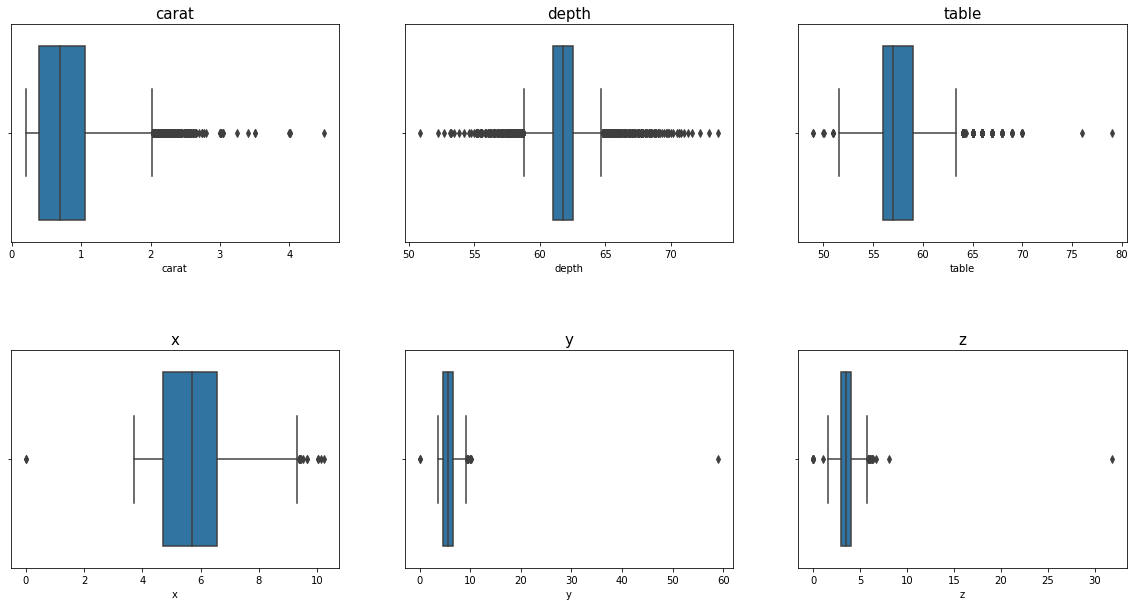

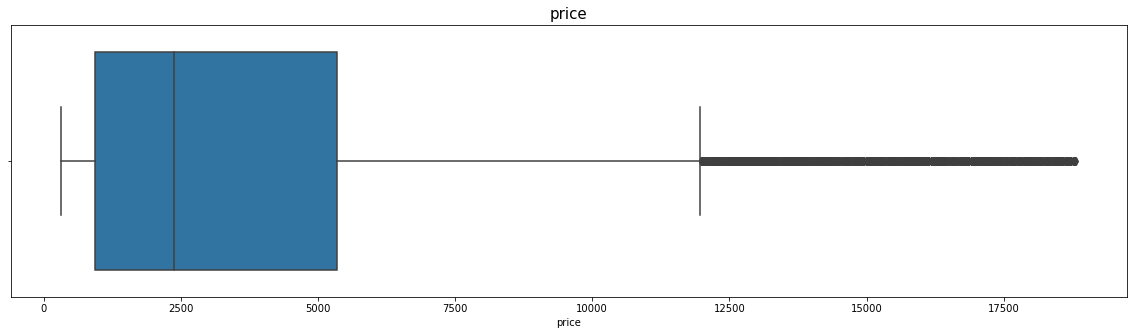

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(2,3,figsize=[20,10])

fig.subplots_adjust(hspace=0.5)

for column, axis in zip(numerical, fig.axes):
    sns.boxplot(data = cubic_zirconia, x = column,ax=axis)
    axis.set_title(column,fontsize=15)
    axis.set_ylabel('')
    
plt.figure(figsize=[20,5])    
sns.boxplot(data = cubic_zirconia, x = 'price')
plt.title('price',fontsize=15)
plt.show()

In [12]:
from scipy import stats
print(color.BOLD+"Shapiro-Wilk test for normality"+color.END)
print('-'*60)
for i in numerical:
    shapiro = stats.shapiro(cubic_zirconia[i])
            #If the p-value is less than 0.05, we reject the null hypothesis that there's 
            #no difference between the means and conclude that a significant difference does exist. 
            #If the p-value is larger than 0.05, we cannot conclude that a significant difference exists.
    if shapiro.pvalue < 0.05:
        print("pvalue for {} column is {},\nThe data is not normally distributed.\n".format(i,round(shapiro.pvalue,5)))
    else:
        print("pvalue for {} column is {},\nThe data is normally distributed.\n".format(i,round(shapiro.pvalue,5)))


Shapiro-Wilk test for normality
------------------------------------------------------------
pvalue for carat column is 0.0,
The data is not normally distributed.

pvalue for depth column is 1.0,
The data is normally distributed.

pvalue for table column is 0.0,
The data is not normally distributed.

pvalue for x column is 0.0,
The data is not normally distributed.

pvalue for y column is 0.0,
The data is not normally distributed.

pvalue for z column is 0.0,
The data is not normally distributed.



C:\Users\vaish\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [13]:
print(color.BOLD+"Detecting outliers using IQR"+color.END)
print('-'*60)
        
sorted(cubic_zirconia)

Q1=cubic_zirconia.quantile(0.25)
Q3=cubic_zirconia.quantile(0.75)
IQR=Q3-Q1

iqr = ((cubic_zirconia < (Q1 - 1.5 * IQR)) |(cubic_zirconia > (Q3 + 1.5 * IQR))).any()
iqr = iqr.to_frame().reset_index().rename(columns={'index':'Columns',0:'Outliers'})
outliers = iqr[iqr['Outliers']==True]
outliers

Detecting outliers using IQR
------------------------------------------------------------


,Columns,Outliers
0,carat,True
4,depth,True
5,price,True
6,table,True
7,x,True
8,y,True
9,z,True


_**Inference**_

---

_The coefficient of variation (CV) is a statistical measure of the relative dispersion of data points in a data series around the mean._

_The coefficient of variation is < 1 for all the variables except the Price. This means that distributions with a coefficient of variation higher than 1 are considered to be high variance whereas those with a CV lower than 1 are considered to be low-variance._

_As per the boxplot and outliers check using the IQR method, there are outliers in the dataset. The columns x,y, and z have the minimum value as 0 which needs to be checked further._

_From the Shapiro Wilkin's Test results, the variables except dept are all not normally distributed._ 


---

_Univariate Analysis - Categorical_

In [14]:
categorical = cubic_zirconia.describe(exclude=np.number).columns
describe_cat = cubic_zirconia.describe(exclude=np.number).T
describe_cat['%'] = (describe_cat['freq'] / describe_cat['count'])*100
describe_cat

,count,unique,top,freq,%
cut,26933,5,Ideal,10805,40.1181
color,26933,7,G,5653,20.9891
clarity,26933,8,SI1,6565,24.3753


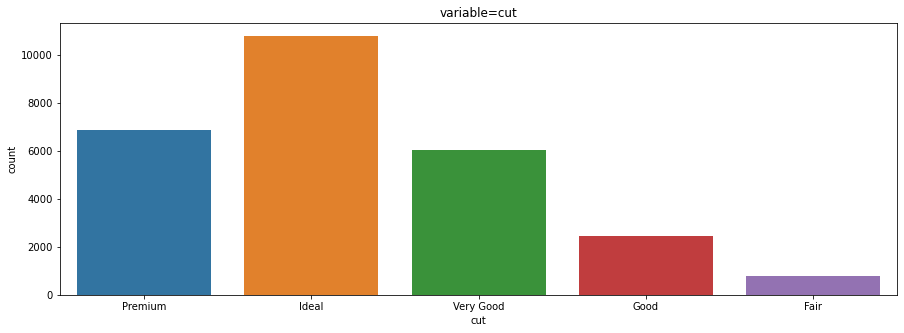

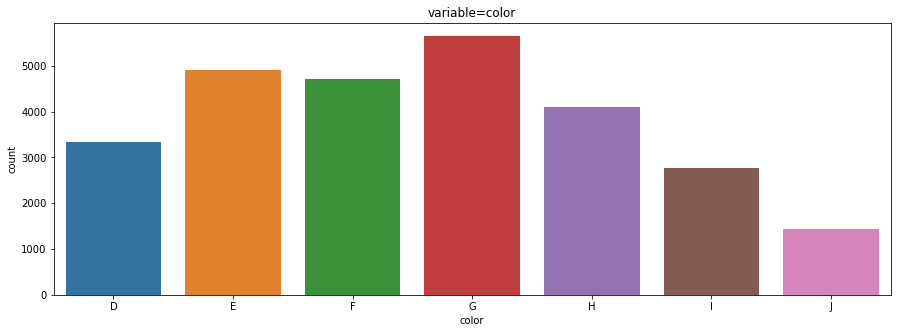

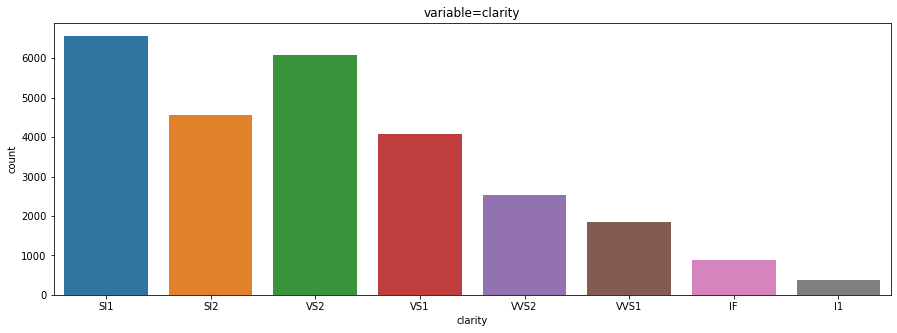

In [15]:
for i in categorical:
    plt.figure(figsize=[15,5])
    sns.countplot(data=cubic_zirconia.sort_values(by='color'),x=i)
    plt.title('variable={}'.format(i))
    plt.show()

_**Inference**_

---

_The quality of a cut ranges from Fair to Ideal. With the 5 unique measure of quality around 10816 i.e. 40.11% of the data are marked as `Ideal` cut._

_The color of the stones with D being the worst and J the best, 5661 of the stones are ranked with `G` quality which is average. This is 20.99% of the data._

_Clarity refers to the absence of the Inclusions and Blemishes. (In order from Best to Worst, IF = flawless, l1= level 1 inclusion). Most of the stones are marked as `SI1` which is 24.37% of the data._

---

_Bivariate Analysis - Numerical and Numerical_

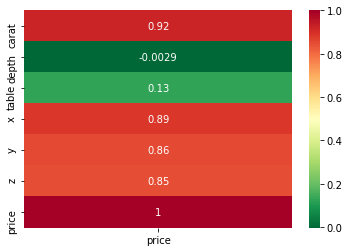

In [16]:
sns.heatmap(cubic_zirconia.corr()[['price']],cmap='RdYlGn_r',annot=True);

_**Inference**_

---

_`Price` and `carat` are highly correlated. x, y and z which is the dimension of the cubic zirconia also have a significant correlation with the price variable. The depth and table are the only variables which as approx. 0 correlation with the price._

---

_Bivariate Analysis - Categorical and Categorical_

In [17]:
cubic_zirconia.describe(exclude=np.number).T

,count,unique,top,freq
cut,26933,5,Ideal,10805
color,26933,7,G,5653
clarity,26933,8,SI1,6565


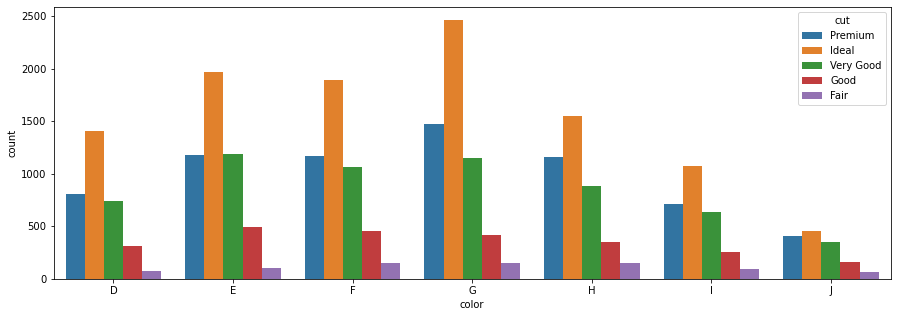

In [18]:
plt.figure(figsize=[15,5])
sns.countplot(data=cubic_zirconia.sort_values(by='color'),x='color',hue='cut');

_**Inferences**_

---

_Cubic zirconia with ideal cut has highest frequency ranging in all types of color. `J` which is the best rank in terms of measuring the color has the high frequency of `Ideal` cut and also for `Very Good` and `Premium cut`._

_`G` in color is the average rank which has most of the cut category in `Ideal` and `Premium`._


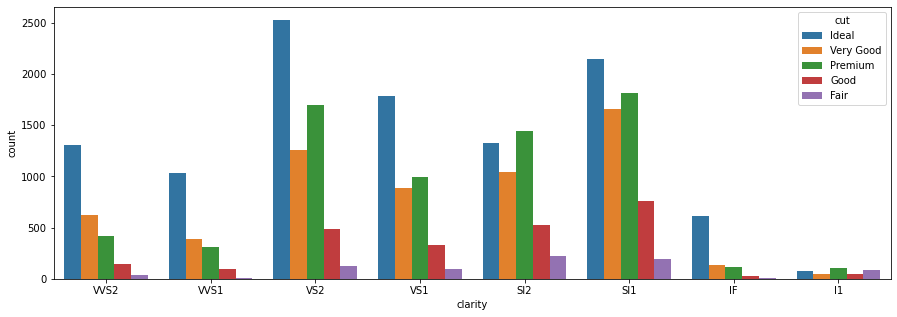

In [19]:
plt.figure(figsize=[15,5])
sns.countplot(data=cubic_zirconia.sort_values(by='clarity',ascending=False),x='clarity',hue='cut');

_**Inference**_

---

_Clarity refers to the absence of the Inclusions and Blemishes. (In order from Best to Worst, IF = flawless, l1= level 1 inclusion) IF, VVS1, VVS2, VS1, VS2, Sl1, Sl2, l1 : VS2 which is the average rank in clarity has most of the cubic zirconia marked as an `Ideal` or `Premium` cut._

---

_Bivariate Analysis - Numerical and Categorical_

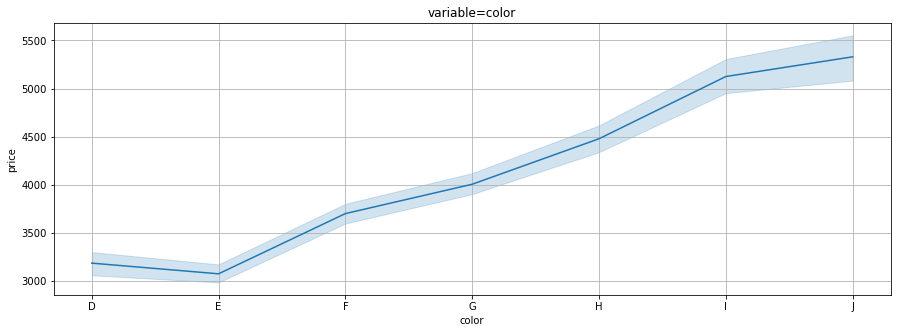

In [20]:
plt.figure(figsize=[15,5])
sns.lineplot(data=cubic_zirconia.sort_values(by='color'),x='color',y='price')
plt.title('variable=color')
plt.grid(True)
plt.show()

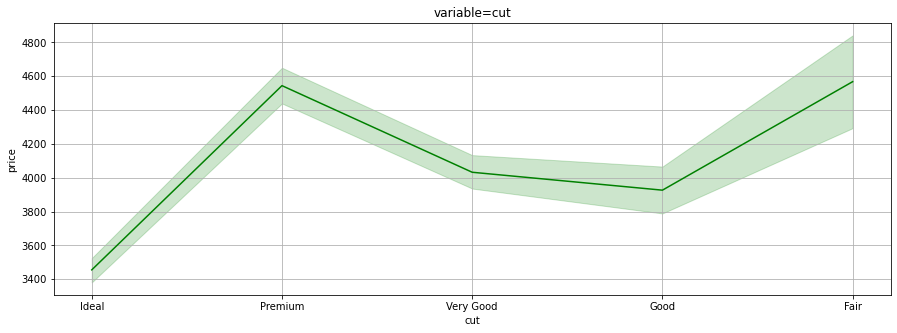

In [21]:
plt.figure(figsize=[15,5])
sns.lineplot(data=cubic_zirconia.sort_index(),x='cut',y='price',color='g')
plt.title('variable=cut')
plt.grid(True)
plt.show()

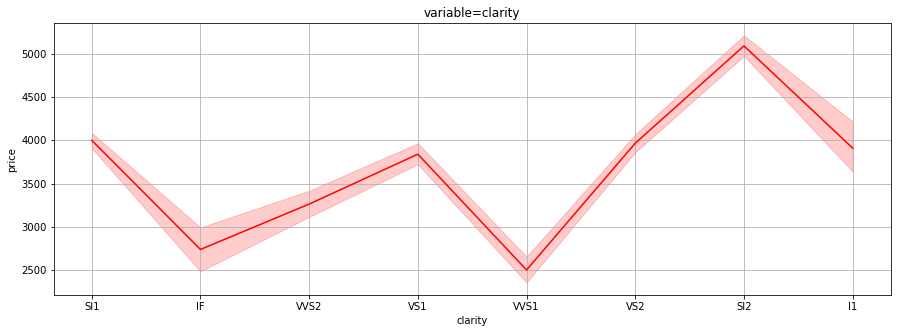

In [22]:
plt.figure(figsize=[15,5])
sns.lineplot(data=cubic_zirconia,x='clarity',y='price',color='r')
plt.title('variable=clarity')
# plt.xticks(['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'Sl1', 'Sl2', 'l1'])
plt.grid(True)
plt.show()

_**Inference**_

---

_The price of the cubic zirconia with `Premium` and `Fair` cut are higher than the rest._

_Colour of the cubic zirconia with D being the worst and J the best. The price shows a positive correlation as the price is low for `D` rank rises as the rank increases towards `J`._

_In order fromBest to Worst, IF = flawless, l1= level 1 inclusion - IF, VVS1, VVS2, VS1, VS2, Sl1, Sl2, l1. The `Sl2` has the highest price range. `VS1 and Sl1` has the second highest price range._

---

_Multivariate Analysis_

<Figure size 1080x1080 with 0 Axes>

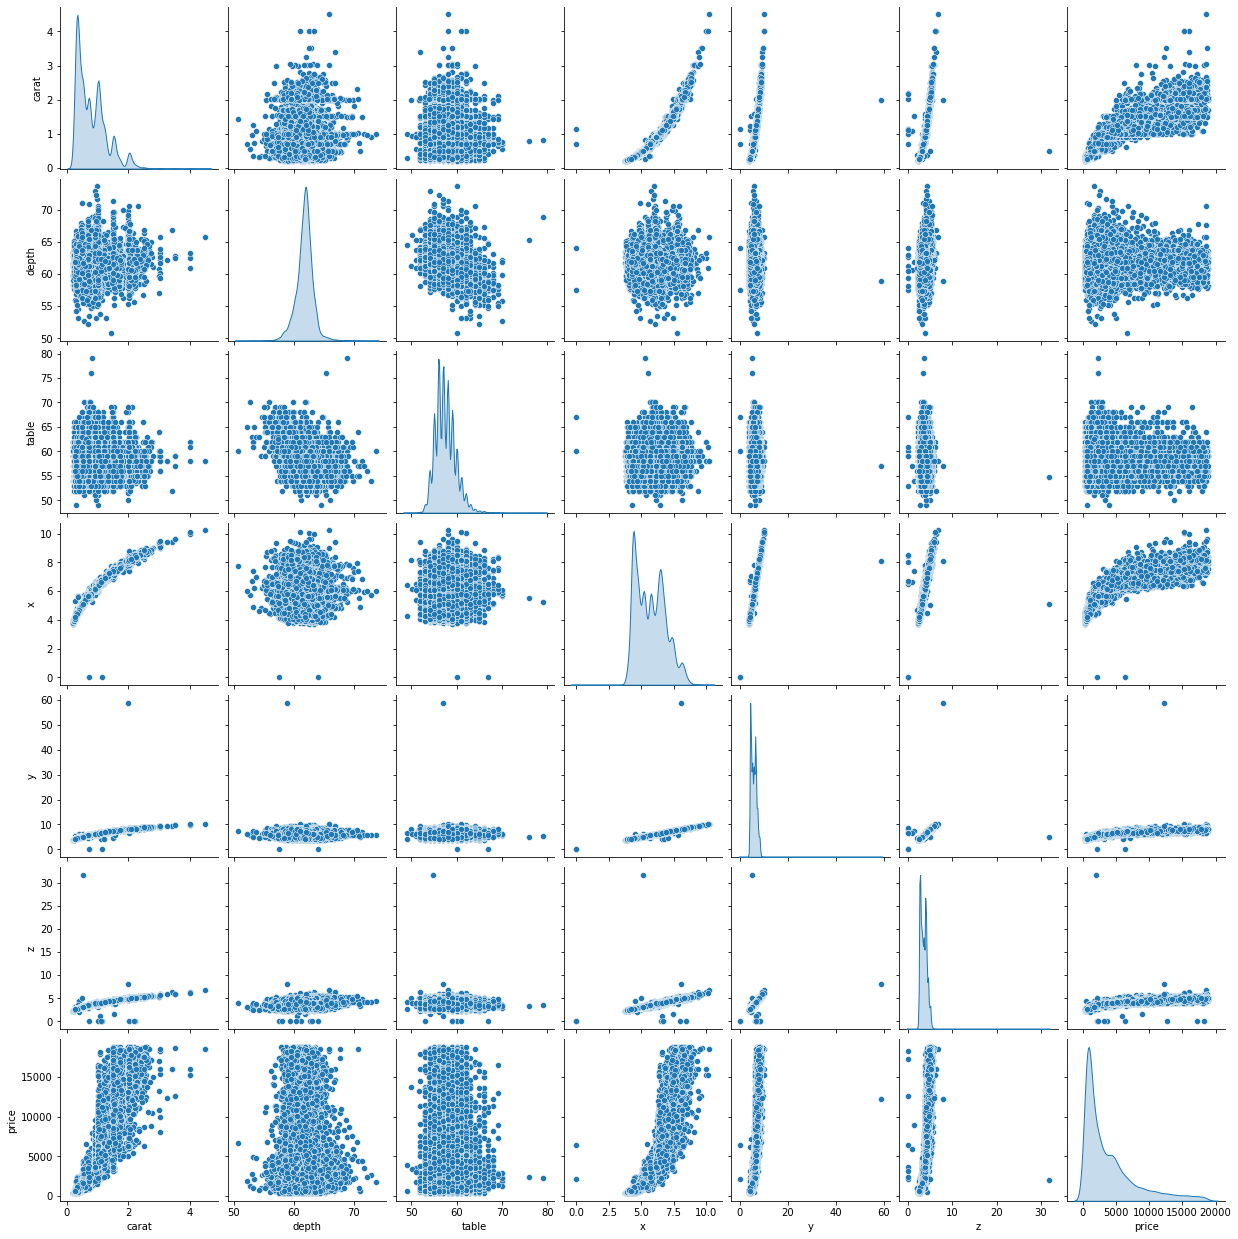

In [23]:
plt.figure(figsize=[15,15])
sns.pairplot(data=cubic_zirconia,diag_kind='kde');

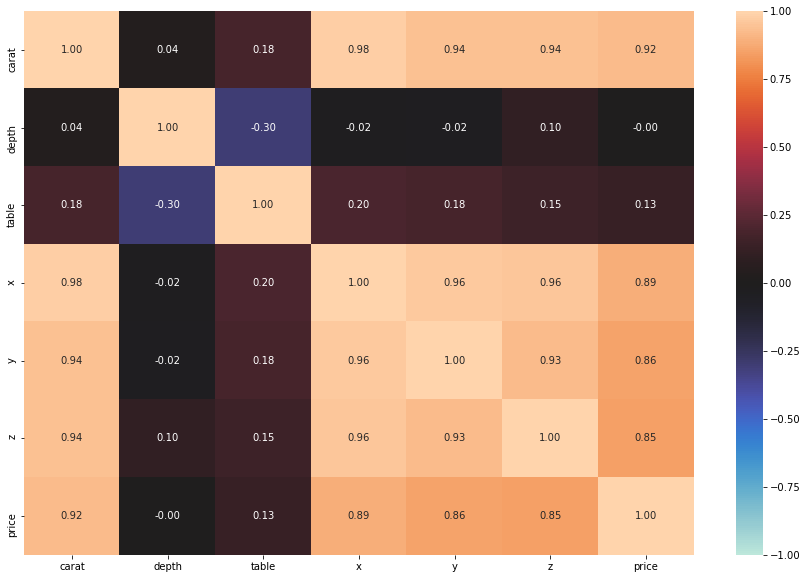

In [24]:
plt.figure(figsize=[15,10])
sns.heatmap(data=cubic_zirconia.corr(),annot=True,fmt='.2f',vmin=-1,vmax=1,center=0);

_**Inference**_

---

_The carat, x, y, and z have high correlation with the price variable._

_Variables depth, table have approx 0 correlation with the price variable._


### 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Do you think scaling is necessary in this case?

_**Null values check**_

In [25]:
cubic_zirconia.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

_Performing statistical analysis on `depth` column:_

In [26]:
cubic_zirconia.depth.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

count    26236.000000
mean        61.745285
std          1.412243
min         50.800000
25%         61.000000
50%         61.800000
75%         62.500000
90%         63.300000
95%         63.800000
99%         65.600000
max         73.600000
Name: depth, dtype: float64

<AxesSubplot:>

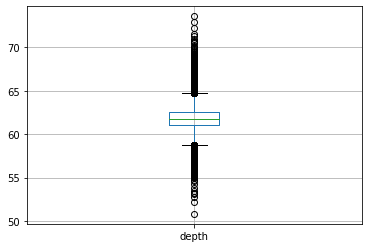

In [27]:
cubic_zirconia.boxplot(column='depth')

_Imputing the missing values based on the median or 50th percentile, also known as Q2 (second quantile)._

In [28]:
cubic_zirconia.fillna(cubic_zirconia.depth.median(),inplace=True,axis=1)

_Re-check for missing values._

In [29]:
#missing values
if cubic_zirconia.isnull().sum().any()==True:
    print('There are {} missing values in the data. Need further checks!'.format(cubic_zirconia.isnull().sum().sum()))
else:
    print('There are no missing values in the data.')
    
print()

There are no missing values in the data.



_**Values which are equal to zero**_

_Checking for variables which have min value as 0_

In [30]:
pd.DataFrame(cubic_zirconia.describe().T.loc[:,'min']).T

,carat,depth,table,x,y,z,price
min,0.2,50.8,49.0,0.0,0.0,0.0,326.0


In [31]:
cubic_zirconia.query('x == 0 or y == 0 or z==0')

,carat,cut,color,clarity,depth,table,x,y,z,price
5821,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6034,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
10827,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12498,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12689,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17506,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18194,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23758,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


In [32]:
cubic_zirconia.query('x == 0 or y == 0 or z==0').shape

(8, 10)

In [33]:
rows_original = cubic_zirconia.shape[0]

_The columns X, Y and Z are the size of the stone and can't be a zero value._

X	 Length of the cubic zirconia in mm.

Y	 Width of the cubic zirconia in mm.

Z	 Height of the cubic zirconia in mm.

_Since, the Length, Width and Height cannot be zero we will drop those columns._
<!-- _We can impute them with the 50 percentile or median._ -->

In [34]:
to_drop = cubic_zirconia.query('x == 0 or y == 0 or z==0')

In [35]:
cubic_zirconia.drop(to_drop.index,axis=0,inplace=True)

In [36]:
now_rows = cubic_zirconia.shape[0]
print('Total number of rows are {} after removing the null values. Total {} rows are with null values i.e. {}% of the dataset.'.format(now_rows,(rows_original-now_rows),(round((rows_original-now_rows)/rows_original*100,4))))

Total number of rows are 26925 after removing the null values. Total 8 rows are with null values i.e. 0.0297% of the dataset.


_**Outlier Treatment**_

In [37]:
from scipy.stats import skew
for i in numerical:
    print('Skewness in {} = {}'.format(i,skew(cubic_zirconia[i])))
    print()

Skewness in carat = 1.1148092515927273

Skewness in depth = -0.028401722720503546

Skewness in table = 0.7648470275882089

Skewness in x = 0.40198758736963747

Skewness in y = 3.8883904771914586

Skewness in z = 2.6393815543007713



In [38]:
# Outlier Treatment - Winsorization

def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [39]:
for column in numerical:
    lr,ur=remove_outlier(cubic_zirconia[column])
    cubic_zirconia[column]=np.where(cubic_zirconia[column]>ur,cubic_zirconia[column].quantile(0.95),cubic_zirconia[column])
    cubic_zirconia[column]=np.where(cubic_zirconia[column]<lr,cubic_zirconia[column].quantile(0.05),cubic_zirconia[column])

In [40]:
from scipy.stats import skew
for i in numerical:
    print('Skewness in {} = {}'.format(i,skew(cubic_zirconia[i])))
    print()

Skewness in carat = 0.7809486410102108

Skewness in depth = -0.2685426806962745

Skewness in table = 0.3501203974981991

Skewness in x = 0.3894077991186886

Skewness in y = 0.38576851069581153

Skewness in z = 0.38717933491895623



_**Scaling**_

_In regression analysis, we can calculate importance of variables by ranking independent variables based on the descending order of absolute value of standardized coefficient. It is also helpful to standardize a variable when an interaction is created from two variables that are not centered on 0, as some amount of collinearity will be induced._

_Also, it is necessary to standardize variables before using Lasso and Ridge Regression as both have constraints on the size of the coefficients associated to each variable. The result of centering the variables means that there is no longer an intercept._

### 1.3 Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Linear regression. Performance Metrics: Check the performance of Predictions on Train and Test sets using Rsquare, RMSE.

<h5 align=center><font size = 5>Linear Regression - sklearn</font></h5>

In [41]:
cubic_zirconia_df = cubic_zirconia.copy()

_Converting categorical columns into codes_

In [42]:
cubic_zirconia['cut'] = pd.Categorical(cubic_zirconia['cut']).codes
cubic_zirconia['color'] = pd.Categorical(cubic_zirconia['color']).codes
cubic_zirconia['clarity'] = pd.Categorical(cubic_zirconia['clarity']).codes
cubic_zirconia.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,2,1,2,62.1,58.0,4.27,4.29,2.66,499
1,0.33,3,3,1,60.8,58.0,4.42,4.46,2.70,984
2,0.90,4,1,7,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,2,2,4,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,2,2,6,60.4,59.0,4.35,4.43,2.65,779


_Defining X and y._

In [43]:
X = cubic_zirconia.drop(['price'],axis=1)
y = cubic_zirconia['price']

_Scaling X data_

In [44]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
pd.options.display.float_format = '{:,.4f}'.format
X_scale = scale.fit_transform(X)
X_scale = pd.DataFrame(X_scale,columns=X.columns)
X_scale.describe()

,carat,cut,color,clarity,depth,table,x,y,z
count,"26,925.0000","26,925.0000","26,925.0000","26,925.0000","26,925.0000","26,925.0000","26,925.0000","26,925.0000","26,925.0000"
mean,-0.0000,-0.0000,0.0000,-0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000
std,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
min,-1.3194,-2.4945,-1.5269,-2.2231,-2.3617,-2.7788,-1.7785,-1.8109,-2.8908
25%,-0.8686,-0.5418,-0.9408,-1.0637,-0.5539,-0.6733,-0.9064,-0.9146,-0.9177
50%,-0.1926,-0.5418,0.2315,0.0958,0.0487,-0.1948,-0.0342,-0.0273,-0.0248
75%,0.5962,0.4345,0.8177,0.6756,0.6513,0.7622,0.7311,0.7256,0.7241
max,2.7821,1.4109,1.9900,1.8350,2.4592,2.8199,3.1784,3.1636,3.1869


_**Splitting the data into train and test.**_

In [45]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.30 , random_state=42)

In [46]:
print('X_train data shape =',X_train.shape)
print('y_train data shape =',y_train.shape)
print('X_test data shape =',X_test.shape)
print('y_test data shape =',y_test.shape)

X_train data shape = (18847, 9)
y_train data shape = (18847,)
X_test data shape = (8078, 9)
y_test data shape = (8078,)


In [47]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()#
linear_model.fit(X_train,y_train)

LinearRegression()

_Coefficient_

In [48]:
for variable, column in enumerate(X_train.columns):
    print("The coefficient for {} is {}\n".format(column, linear_model.coef_[variable]))

The coefficient for carat is 5328.730260501825

The coefficient for cut is 75.20551056111245

The coefficient for color is -422.0041699920125

The coefficient for clarity is 486.6236780902803

The coefficient for depth is -45.8938876243742

The coefficient for table is -230.57068703638157

The coefficient for x is -2274.8667253801395

The coefficient for y is 2337.4873109209593

The coefficient for z is -1480.5675505967884



_Intercept_

In [49]:
# Let us check the intercept for the model
intercept = linear_model.intercept_
print("The intercept for Linear model is {}".format(intercept))

The intercept for Linear model is 3940.020772707241


_**Performance Metrics - Linear**_

In [50]:
from sklearn import metrics
# linear_model = LinearRegression(normalize=True)
# linear_model.fit(X_train,y_train)
# pred = linear_model.predict(X_test)

test_pred = linear_model.predict(X_test)
train_pred = linear_model.predict(X_train)

print('Linear Regression Model')
print('======================')
print()
print('Test set evaluation:\n-----------------------------')
mae = metrics.mean_absolute_error(y_test, test_pred)
mse = metrics.mean_squared_error(y_test, test_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, test_pred))
r2_square = metrics.r2_score(y_test, test_pred)

print('mean_absolute_error:', mae)
print('mean_squared_error:', mse)
print('RMSE:', rmse)
print('R2 Square', r2_square)


print('=====================')
print('Train set evaluation:\n-----------------------------')
mae = metrics.mean_absolute_error(y_train, train_pred)
mse = metrics.mean_squared_error(y_train, train_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_train, train_pred))
r2_square = metrics.r2_score(y_train, train_pred)

print('mean_absolute_error:', mae)
print('mean_squared_error:', mse)
print('RMSE:', rmse)
print('R2 Square', r2_square)
print('=============')

Linear Regression Model

Test set evaluation:
-----------------------------
mean_absolute_error: 956.3597553288622
mean_squared_error: 2119943.8706688173
RMSE: 1456.0027028370578
R2 Square 0.8699315649879396
Train set evaluation:
-----------------------------
mean_absolute_error: 957.3434380842376
mean_squared_error: 2159238.07026341
RMSE: 1469.4346090464217
R2 Square 0.8659797090661285


In [51]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [52]:
results_train = pd.DataFrame(data=[["Linear Regression", *evaluate(y_train, train_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_train

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,957.3434,"2,159,238.0703","1,469.4346",0.8660,0.8670


In [53]:
results_test = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_test

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,956.3598,"2,119,943.8707","1,456.0027",0.8699,0.8670


<h5 align=center><font size = 5>Lasso Regression - sklearn</font></h5>

In [54]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(max_iter=10000,random_state=42)
lasso_model.fit(X_train,y_train)

Lasso(max_iter=10000, random_state=42)

_Coefficient_

In [55]:
for variable, column in enumerate(X_train.columns):
    print("The coefficient for {} is {}\n".format(column, lasso_model.coef_[variable]))

The coefficient for carat is 5265.81624995657

The coefficient for cut is 79.73583768368432

The coefficient for color is -420.51371585013266

The coefficient for clarity is 488.14340512964077

The coefficient for depth is -67.07245389077376

The coefficient for table is -233.62466297234403

The coefficient for x is -1607.689245125138

The coefficient for y is 1526.2234812646618

The coefficient for z is -1273.12498975702



_Intercept_

In [56]:
# Let us check the intercept for the model
intercept = lasso_model.intercept_
print("The intercept for Linear model is {}".format(intercept))

The intercept for Linear model is 3939.9275784025954


_**Performance Metrics - Lasso**_

In [57]:
from sklearn import metrics
# linear_model = LinearRegression(normalize=True)
# linear_model.fit(X_train,y_train)
# pred = linear_model.predict(X_test)

test_pred = lasso_model.predict(X_test)
train_pred = lasso_model.predict(X_train)

print('Lasso Regression Model')
print('======================')
print()
print('Test set evaluation:\n-----------------------------')
mae = metrics.mean_absolute_error(y_test, test_pred)
mse = metrics.mean_squared_error(y_test, test_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, test_pred))
r2_square = metrics.r2_score(y_test, test_pred)

print('mean_absolute_error:', mae)
print('mean_squared_error:', mse)
print('RMSE:', rmse)
print('R2 Square', r2_square)


print('=====================')
print('Train set evaluation:\n-----------------------------')
mae = metrics.mean_absolute_error(y_train, train_pred)
mse = metrics.mean_squared_error(y_train, train_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_train, train_pred))
r2_square = metrics.r2_score(y_train, train_pred)

print('mean_absolute_error:', mae)
print('mean_squared_error:', mse)
print('RMSE:', rmse)
print('R2 Square', r2_square)
print('=============')

Lasso Regression Model

Test set evaluation:
-----------------------------
mean_absolute_error: 956.5790405550681
mean_squared_error: 2123209.1835062588
RMSE: 1457.1235992551417
R2 Square 0.8697312228296084
Train set evaluation:
-----------------------------
mean_absolute_error: 957.9525286880871
mean_squared_error: 2160967.288258351
RMSE: 1470.0228869845364
R2 Square 0.8658723794011131


In [58]:
results_lasso = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_train, train_pred) , cross_val(lasso_model)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_train = results_train.append(results_lasso, ignore_index=True)
results_train

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,957.3434,"2,159,238.0703","1,469.4346",0.8660,0.8670
1,Lasso Regression,957.9525,"2,160,967.2883","1,470.0229",0.8659,0.8669


In [59]:
results_testlasso = pd.DataFrame(data=[["Lasso Regression", *evaluate(y_test, test_pred) , cross_val(lasso_model)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_test = results_test.append(results_testlasso, ignore_index=True)

results_test

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,956.3598,"2,119,943.8707","1,456.0027",0.8699,0.8670
1,Lasso Regression,956.5790,"2,123,209.1835","1,457.1236",0.8697,0.8669


<h5 align=center><font size = 5>Ridge Regression - sklearn</font></h5>

In [60]:
from sklearn.linear_model import Ridge  
ridge_model = Ridge(random_state=42)  #max_iter=10000,
ridge_model.fit(X_train,y_train)

Ridge(random_state=42)

_Coefficient_

In [61]:
for variable, column in enumerate(X_train.columns):
    print("The coefficient for {} is {}\n".format(column, ridge_model.coef_[variable]))

The coefficient for carat is 5316.424513944125

The coefficient for cut is 75.85943249094453

The coefficient for color is -421.8543898421464

The coefficient for clarity is 486.94206101584916

The coefficient for depth is -47.91956643108293

The coefficient for table is -231.04817594127147

The coefficient for x is -2191.3349562629965

The coefficient for y is 2244.8534253672624

The coefficient for z is -1459.1499522412698



_Intercept_

In [62]:
# Let us check the intercept for the model
intercept = ridge_model.intercept_
print("The intercept for Linear model is {}".format(intercept))

The intercept for Linear model is 3940.0093481305803


_**Performance Metrics - Ridge**_

In [63]:
from sklearn import metrics
# linear_model = LinearRegression(normalize=True)
# linear_model.fit(X_train,y_train)
# pred = linear_model.predict(X_test)

test_pred = ridge_model.predict(X_test)
train_pred = ridge_model.predict(X_train)

print('Ridge Regression Model')
print('======================')
print()
print('Test set evaluation:\n-----------------------------')
mae = metrics.mean_absolute_error(y_test, test_pred)
mse = metrics.mean_squared_error(y_test, test_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, test_pred))
r2_square = metrics.r2_score(y_test, test_pred)

print('mean_absolute_error:', mae)
print('mean_squared_error:', mse)
print('RMSE:', rmse)
print('R2 Square', r2_square)


print('=====================')
print('Train set evaluation:\n-----------------------------')
mae = metrics.mean_absolute_error(y_train, train_pred)
mse = metrics.mean_squared_error(y_train, train_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_train, train_pred))
r2_square = metrics.r2_score(y_train, train_pred)

print('mean_absolute_error:', mae)
print('mean_squared_error:', mse)
print('RMSE:', rmse)
print('R2 Square', r2_square)
print('=============')

Ridge Regression Model

Test set evaluation:
-----------------------------
mean_absolute_error: 956.5373916506401
mean_squared_error: 2120141.1981727206
RMSE: 1456.0704647003595
R2 Square 0.8699194580260654
Train set evaluation:
-----------------------------
mean_absolute_error: 957.5281195941614
mean_squared_error: 2159263.9269405385
RMSE: 1469.4434071921717
R2 Square 0.8659781041854815


In [64]:
result_ridge = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_train, train_pred) , cross_val(ridge_model)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_train = results_train.append(result_ridge, ignore_index=True)
results_train

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,957.3434,"2,159,238.0703","1,469.4346",0.8660,0.8670
1,Lasso Regression,957.9525,"2,160,967.2883","1,470.0229",0.8659,0.8669
2,Ridge Regression,957.5281,"2,159,263.9269","1,469.4434",0.8660,0.8670


In [65]:
result_ridge = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred) , cross_val(ridge_model)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_test = results_test.append(result_ridge, ignore_index=True)

results_test

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,956.3598,"2,119,943.8707","1,456.0027",0.8699,0.8670
1,Lasso Regression,956.5790,"2,123,209.1835","1,457.1236",0.8697,0.8669
2,Ridge Regression,956.5374,"2,120,141.1982","1,456.0705",0.8699,0.8670


<h5 align=center><font size = 5>Stochastic Gradient Descent Regression - sklearn</font></h5>

In [66]:
grid={'penalty':['l2','elasticnet'],
      'tol':[0.0001,0.00001]}

In [67]:
from sklearn.linear_model import SGDRegressor
model = SGDRegressor(max_iter=10000)

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 10)

In [68]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SGDRegressor(max_iter=10000),
             param_grid={'penalty': ['l2', 'elasticnet'],
                         'tol': [0.0001, 1e-05]})

In [69]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'tol': 0.0001} 

SGDRegressor(max_iter=10000, tol=0.0001)


In [70]:
best_model = grid_search.best_estimator_

_**Performance metrics: SGDRegressor**_

In [71]:
from sklearn import metrics
# linear_model = LinearRegression(normalize=True)
# linear_model.fit(X_train,y_train)
# pred = linear_model.predict(X_test)

test_pred = best_model.predict(X_test)
train_pred = best_model.predict(X_train)

print('SGD Regression Model')
print('======================')
print()
print('Test set evaluation:\n-----------------------------')
mae = metrics.mean_absolute_error(y_test, test_pred)
mse = metrics.mean_squared_error(y_test, test_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, test_pred))
r2_square = metrics.r2_score(y_test, test_pred)

print('mean_absolute_error:', mae)
print('mean_squared_error:', mse)
print('RMSE:', rmse)
print('R2 Square', r2_square)


print('=====================')
print('Train set evaluation:\n-----------------------------')
mae = metrics.mean_absolute_error(y_train, train_pred)
mse = metrics.mean_squared_error(y_train, train_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_train, train_pred))
r2_square = metrics.r2_score(y_train, train_pred)

print('mean_absolute_error:', mae)
print('mean_squared_error:', mse)
print('RMSE:', rmse)
print('R2 Square', r2_square)
print('=============')

SGD Regression Model

Test set evaluation:
-----------------------------
mean_absolute_error: 954.2122390858062
mean_squared_error: 2131443.4796513272
RMSE: 1459.946396156834
R2 Square 0.8692260103908106
Train set evaluation:
-----------------------------
mean_absolute_error: 955.7856344662705
mean_squared_error: 2166995.383992754
RMSE: 1472.071799876879
R2 Square 0.8654982255941623


In [72]:
result_SGD = pd.DataFrame(data=[["SGD Regression", *evaluate(y_train, train_pred) , cross_val(best_model)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_train = results_train.append(result_SGD, ignore_index=True)
results_train.drop('Cross Validation',axis=1,inplace=True)

In [73]:
result_SGD = pd.DataFrame(data=[["SGD Regression", *evaluate(y_test, test_pred) , cross_val(best_model)]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_test = results_test.append(result_SGD, ignore_index=True)

results_test.drop('Cross Validation',axis=1,inplace=True)


<h6 align=center><font size = 4>Performance: Train Data</font></h6>



In [74]:
results_train

,Model,MAE,MSE,RMSE,R2 Square
0,Linear Regression,957.3434,"2,159,238.0703","1,469.4346",0.8660
1,Lasso Regression,957.9525,"2,160,967.2883","1,470.0229",0.8659
2,Ridge Regression,957.5281,"2,159,263.9269","1,469.4434",0.8660
3,SGD Regression,955.7856,"2,166,995.3840","1,472.0718",0.8655


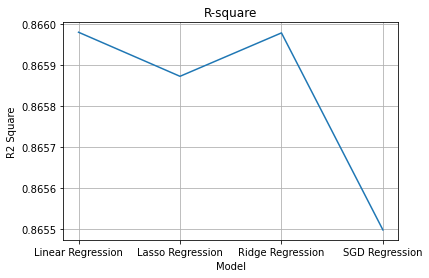

In [75]:
sns.lineplot(data=results_train,y='R2 Square',x='Model')
plt.grid(True)
plt.title('R-square');

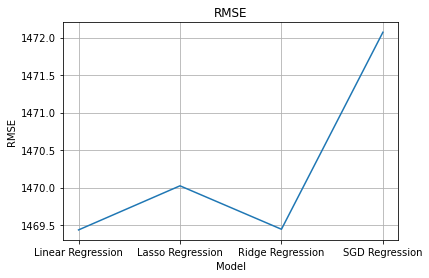

In [76]:
sns.lineplot(data=results_train,y='RMSE',x='Model')
plt.grid(True)
plt.title('RMSE');

<h6 align=center><font size = 4>Performance: Test Data</font></h6>

In [77]:
results_test

,Model,MAE,MSE,RMSE,R2 Square
0,Linear Regression,956.3598,"2,119,943.8707","1,456.0027",0.8699
1,Lasso Regression,956.5790,"2,123,209.1835","1,457.1236",0.8697
2,Ridge Regression,956.5374,"2,120,141.1982","1,456.0705",0.8699
3,SGD Regression,954.2122,"2,131,443.4797","1,459.9464",0.8692


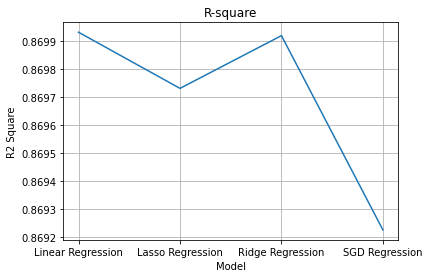

In [78]:
sns.lineplot(data=results_test,y='R2 Square',x='Model')
plt.grid(True)
plt.title('R-square');

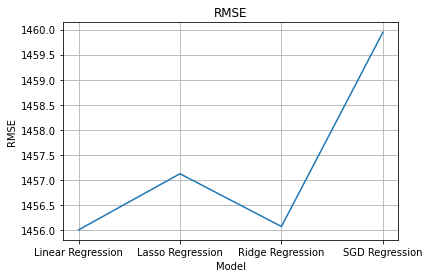

In [79]:
sns.lineplot(data=results_test,y='RMSE',x='Model')
plt.grid(True)
plt.title('RMSE');

### 1.4 Inference: Basis on these predictions, what are the business insights and recommendations.

Based on the observation the price is higher when carat is more than 1.6, cut is marked as ‘ideal’ or ‘premium’ and color is more or equal to average rank (>=G rank) and when table is more than 50% and depth more than 60.

In order from Best to Worst, IF = flawless, l1= level 1 inclusion - IF, VVS1, VVS2, VS1, VS2, Sl1, Sl2, l1. The Sl2 has the highest price range. VS1 and Sl1 has the second highest price range.

 
Based on cut, color, clarity, depth and carat the cubic zirconia (CZ) stones can distinguish between higher profitable stones and lower profitable stones. 


# Problem 2: Logistic Regression and LDA


_You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages._

_**Data Dictionary:**_


|Variable Name|	Description|
|:------------|:-----------|
|Holiday_Package| 	 Opted for Holiday Package yes/no?|
|Salary| 	 Employee salary|
|age| 	 Age in years|
|edu| 	 Years of formal education|
|no_young_children| 	 The number of young children (younger than 7 years)|
|no_older_children| 	 Number of older children|
|foreign| 	 foreigner Yes/No|

### 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

_**Reading the data**_

In [80]:
holiday_package = pd.read_csv('Holiday_Package.csv')
holiday_package.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


_**Initial checks**: Null values, Duplicate values, shape, dimension, datatypes etc._

In [81]:
#Info/dtype
print(color.BLUE+color.BOLD+'Info of the data'+color.END)
print('-'*len('Info of the data'))
print(holiday_package.info())

print()

#shape/elements
print(color.BLUE+color.BOLD+'Dimension check'+color.END)
print('-'*len('Dimension check'))
print('Total number of rows in the dataset =',holiday_package.shape[0])
print('Total number of columns in the dataset =',holiday_package.shape[1])
print('Total number of elements in the dataset =',holiday_package.size)
print()

#missing values
print(color.BLUE+color.BOLD+'Missing values check'+color.END)
print('-'*len('Missing values check'))
if holiday_package.isnull().sum().any()==True:
    print('There are {} missing values in the data. Need further checks!'.format(holiday_package.isnull().sum().sum()))
else:
    print('There are no missing values in the data.')
    
print()

#duplicate data check

print(color.BLUE+color.BOLD+"Duplicate Values Check"+color.END)
print('-'*len('Duplicate Values Check'))
dups = holiday_package.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
if dups.sum().any()==True:
    print('Need further checks!')
else:
    print('There are no duplicate values in the dataset.')
print()


Info of the data
----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         872 non-null    int64 
 1   Holliday_Package   872 non-null    object
 2   Salary             872 non-null    int64 
 3   age                872 non-null    int64 
 4   educ               872 non-null    int64 
 5   no_young_children  872 non-null    int64 
 6   no_older_children  872 non-null    int64 
 7   foreign            872 non-null    object
dtypes: int64(6), object(2)
memory usage: 54.6+ KB
None

Dimension check
---------------
Total number of rows in the dataset = 872
Total number of columns in the dataset = 8
Total number of elements in the dataset = 6976

Missing values check
--------------------
There are no missing values in the data.

Duplicate Values Check
----------------------
Number of duplicate rows = 0
There are n

_**Inference**_

---

_There are total of 872 records in the Holiday Package dataset with total 8 columns. This means that the total elements in the dataset are 6976._

_There are no missing or duplicate values in the data however, this needs to be further checked after removing the Unnamed: 0 column._

_There are 6 integer columns and 2 object columns._

---


_Dropping `Unnamed: 0`column_

In [82]:
holiday_package.drop('Unnamed: 0',inplace=True,axis=1)

_Duplicate check after removing the Unnamed columns_

In [83]:
#duplicate data check

print(color.BLUE+color.BOLD+"Duplicate Values Check"+color.END)
print('-'*len('Duplicate Values Check'))
dups = holiday_package.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
if dups.sum().any()==True:
    print('Need further checks!')
else:
    print('There are no duplicate values in the dataset.')
print()


Duplicate Values Check
----------------------
Number of duplicate rows = 0
There are no duplicate values in the dataset.



_Binning age groups and Salary will provide us with more insights and will tell us how other factors are correlated with age and salary_

count   872.0000
mean     39.9553
std      10.5517
min      20.0000
25%      32.0000
50%      39.0000
75%      48.0000
max      62.0000
Name: age, dtype: float64


<AxesSubplot:>

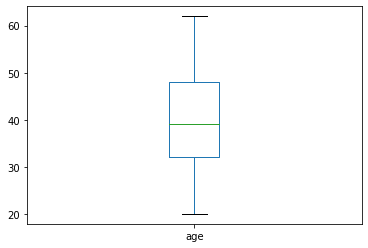

In [84]:
print(holiday_package['age'].describe())
holiday_package['age'].plot.box()

count       872.0000
mean     47,729.1720
std      23,418.6685
min       1,322.0000
25%      35,324.0000
50%      41,903.5000
75%      53,469.5000
max     236,961.0000
Name: Salary, dtype: float64


<AxesSubplot:>

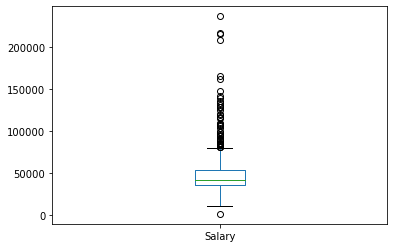

In [85]:
print(holiday_package['Salary'].describe())
holiday_package['Salary'].plot.box()

<Figure size 1080x1080 with 0 Axes>

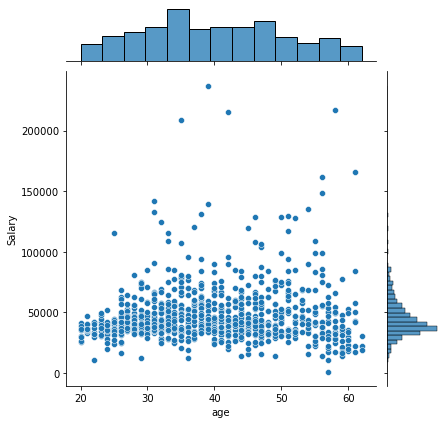

In [86]:
plt.figure(figsize=[15,15])
sns.jointplot(data=holiday_package,x='age',y='Salary');

_Creating bins for Salary_

In [87]:
#[0-30k][30k-60k][60k-90k][90k-120k][120k-150k][150k-180k][180k-210k][210k-240k]
salary_group = []
for i in holiday_package['Salary']:
    if i <= 30000 and i > 0:
        salary_group.append('0-30k')
    elif i <= 60000 and i > 30000:
        salary_group.append('30k-60k')
    elif i <= 90000 and i > 60000:
        salary_group.append('60k-90k')
    elif i <= 120000 and i > 90000:
        salary_group.append('90k-120k')
    elif i <= 150000 and i > 120000:
        salary_group.append('120k-150k')
    elif i <= 180000 and i > 150000:
        salary_group.append('150k-180k')
    elif i <= 210000 and i > 180000:
        salary_group.append('180k-210k')
    elif i <= 240000 and i > 210000:
        salary_group.append('210k-240k')
holiday_package['salary_group'] = salary_group

_Creating bins for Age group_

In [88]:
# [0-30][30-40][40-50][50-60][60-70]

age_group = []
for i in holiday_package['age']:
    if i <= 30 and i >= 0:
        age_group.append('0-30')    
    elif i <=40 and i > 30:
        age_group.append('30-40')
    elif i <=50 and i > 40:
        age_group.append('40-50')
    elif i <=60 and i > 50:
        age_group.append('50-60')
    elif i <=70 and i > 60:
        age_group.append('60-70')

holiday_package['age_group'] = age_group
holiday_package.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign,salary_group,age_group
0,no,48412,30,8,1,1,no,30k-60k,0-30
1,yes,37207,45,8,0,1,no,30k-60k,40-50
2,no,58022,46,9,0,0,no,30k-60k,40-50
3,no,66503,31,11,2,0,no,60k-90k,30-40
4,no,66734,44,12,0,2,no,60k-90k,40-50


In [89]:
holiday_package.dtypes

Holliday_Package     object
Salary                int64
age                   int64
educ                  int64
no_young_children     int64
no_older_children     int64
foreign              object
salary_group         object
age_group            object
dtype: object

<!-- _Let's keep the dataset with the duplicate values as there might be various factors that distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, it may provide us with attributes that are most important._

---
 -->
_**Exploratory Data Analysis**_

---

_Univariate Analysis - Numerical_

In [90]:
numerical = holiday_package.describe().columns.tolist()
categorical = holiday_package.describe(exclude=np.number).columns.tolist()
desc = holiday_package.describe().T
desc['cv'] = desc['std']/desc['mean']
desc

,count,mean,std,min,25%,50%,75%,max,cv
Salary,872.0000,"47,729.1720","23,418.6685","1,322.0000","35,324.0000","41,903.5000","53,469.5000","236,961.0000",0.4907
age,872.0000,39.9553,10.5517,20.0000,32.0000,39.0000,48.0000,62.0000,0.2641
educ,872.0000,9.3073,3.0363,1.0000,8.0000,9.0000,12.0000,21.0000,0.3262
no_young_children,872.0000,0.3119,0.6129,0.0000,0.0000,0.0000,0.0000,3.0000,1.9648
no_older_children,872.0000,0.9828,1.0868,0.0000,0.0000,1.0000,2.0000,6.0000,1.1058


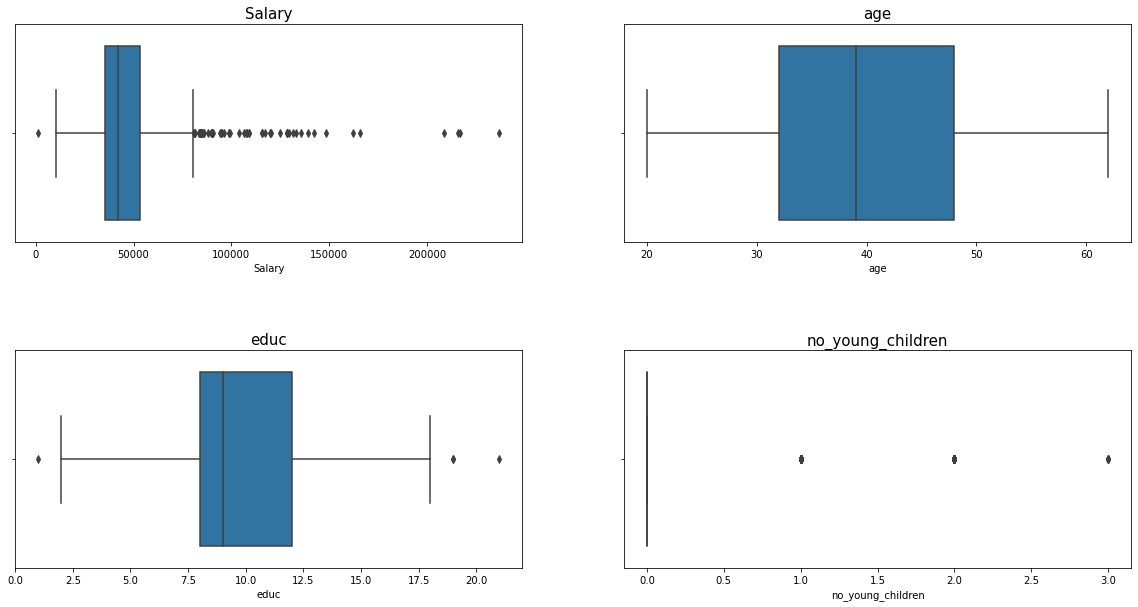

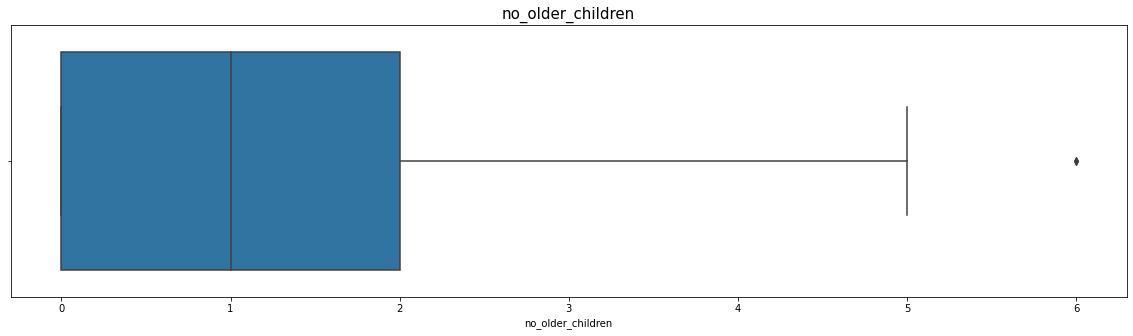

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(2,2,figsize=[20,10])

fig.subplots_adjust(hspace=0.5)

for column, axis in zip(numerical, fig.axes):
    sns.boxplot(data = holiday_package, x = column,ax=axis)
    axis.set_title(column,fontsize=15)
    axis.set_ylabel('')
    
plt.figure(figsize=[20,5])    
sns.boxplot(data = holiday_package, x = 'no_older_children')
plt.title('no_older_children',fontsize=15)
plt.show()

In [92]:
from scipy import stats
print(color.BOLD+"Shapiro-Wilk test for normality"+color.END)
print('-'*60)
for i in numerical:
    shapiro = stats.shapiro(holiday_package[i])
            #If the p-value is less than 0.05, we reject the null hypothesis that there's 
            #no difference between the means and conclude that a significant difference does exist. 
            #If the p-value is larger than 0.05, we cannot conclude that a significant difference exists.
    if shapiro.pvalue < 0.05:
        print("pvalue for {} column is {},\nThe data is not normally distributed.\n".format(i,round(shapiro.pvalue,5)))
    else:
        print("pvalue for {} column is {}, The data is normally distributed.\n".format(i,round(shapiro.pvalue,5)))


Shapiro-Wilk test for normality
------------------------------------------------------------
pvalue for Salary column is 0.0,
The data is not normally distributed.

pvalue for age column is 0.0,
The data is not normally distributed.

pvalue for educ column is 0.0,
The data is not normally distributed.

pvalue for no_young_children column is 0.0,
The data is not normally distributed.

pvalue for no_older_children column is 0.0,
The data is not normally distributed.



In [93]:
print(color.BOLD+"Detecting outliers using IQR"+color.END)
print('-'*60)
        
sorted(holiday_package)

Q1=holiday_package.quantile(0.25)
Q3=holiday_package.quantile(0.75)
IQR=Q3-Q1

iqr = ((holiday_package < (Q1 - 1.5 * IQR)) |(holiday_package > (Q3 + 1.5 * IQR))).any()
iqr = iqr.to_frame().reset_index().rename(columns={'index':'Columns',0:'Outliers'})
outliers = iqr[iqr['Outliers']==True]
outliers

Detecting outliers using IQR
------------------------------------------------------------


,Columns,Outliers
1,Salary,True
4,educ,True
6,no_older_children,True
7,no_young_children,True


_**Inference**_

---

The data is not normally distributed for the variables and there are outliers for Salary, education, no_older_children and no_younger_children.
The coefficient of variance is higher in no_older_children and no_younger_children.


---


_Univariate Analysis - Categorical_

In [94]:
desc = holiday_package.describe(exclude=np.number).T
desc['%'] = (desc['freq']/desc['count'])*100
desc

,count,unique,top,freq,%
Holliday_Package,872,2,no,471,54.0138
foreign,872,2,no,656,75.2294
salary_group,872,8,30k-60k,625,71.6743
age_group,872,5,30-40,283,32.4541


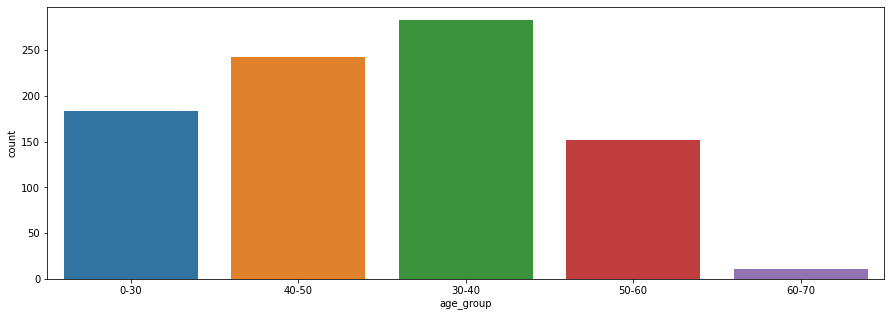

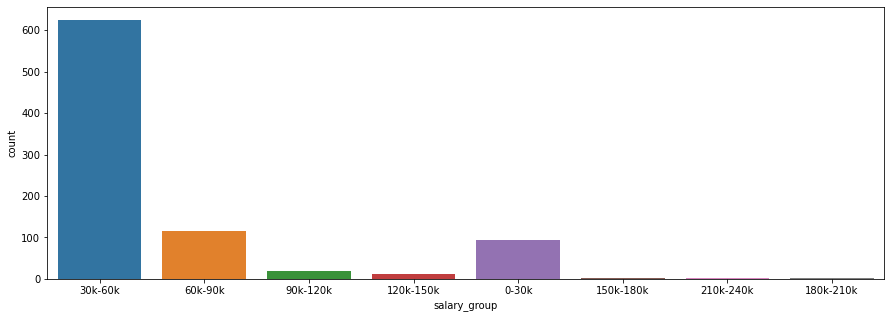

In [95]:
for i in ['age_group','salary_group']:
    plt.figure(figsize=[15,5])
    sns.countplot(data=holiday_package,x=i)
    plt.show()

Holliday_Package 
--------------
 no    54.0138
yes   45.9862
Name: Holliday_Package, dtype: float64 




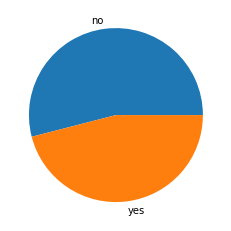

foreign 
--------------
 no    75.2294
yes   24.7706
Name: foreign, dtype: float64 




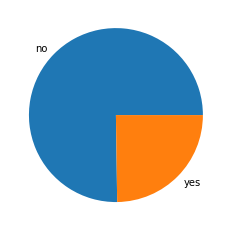

In [96]:
for i in ['Holliday_Package','foreign']:
    print(i,'\n--------------\n',holiday_package[i].value_counts(normalize=True)*100,'\n\n')
    plt.pie(holiday_package[i].value_counts(normalize=True)*100,
            labels=(holiday_package[i].value_counts(normalize=True)*100).index)
    plt.show()

_**Inference**_

---

Most of the employees lies in the 30-40 age group and most of the employees lies in the 30k to 60k salary bin. Out of total employees 75.22% are residents and not foreigner. Only 45.98% of employees opt for the holiday package.



---


_Bivariate Analysis - Numerical and Numerical_

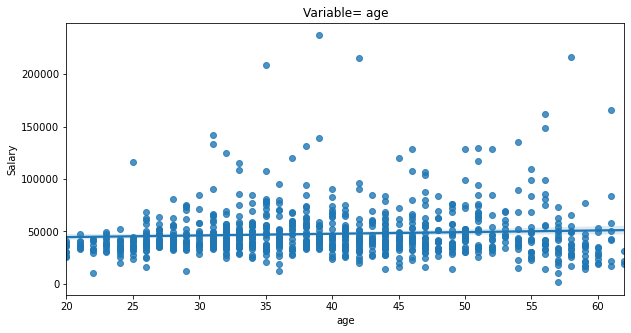

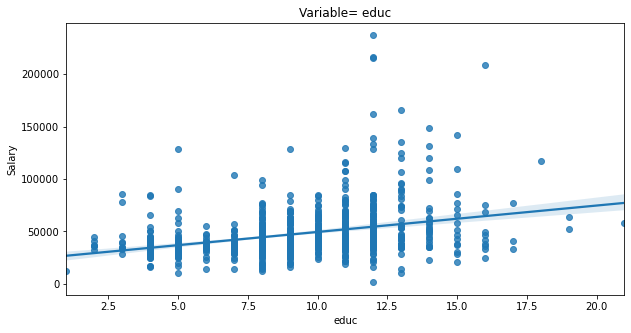

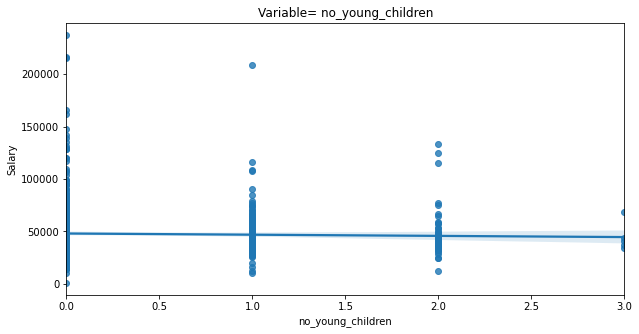

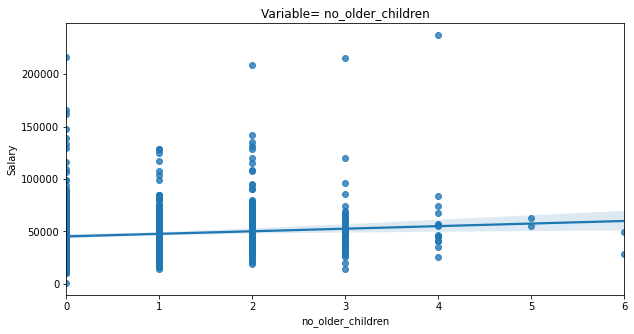

In [97]:
for i in numerical[1:]:
    plt.figure(figsize=[10,5])
    sns.regplot(data=holiday_package,x=i,y=numerical[0])
    plt.title('Variable= '+i)
    plt.show()

_**Inference**_

---

Between numerical variables, salary is more centered around 50,000. There seems to be an upward trend however as the education level increases as well as age. Employees with no older children shows a positive trend in salary while employees with no younger children is almost non linear.

---


_Bivariate Analysis - Categorical and Categorical_

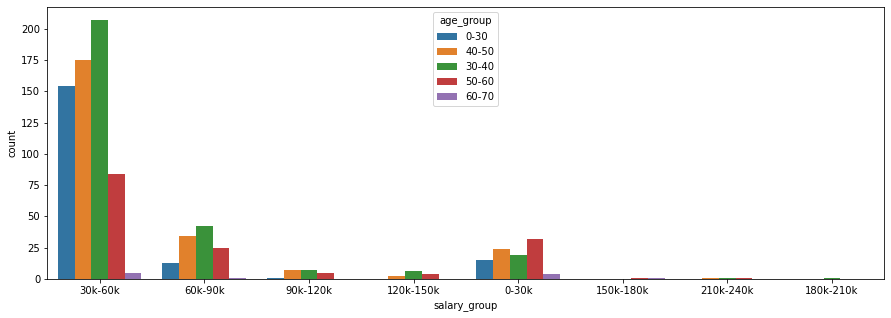

In [98]:
plt.figure(figsize=[15,5])
sns.countplot(data=holiday_package,x='salary_group',hue='age_group')
plt.show()

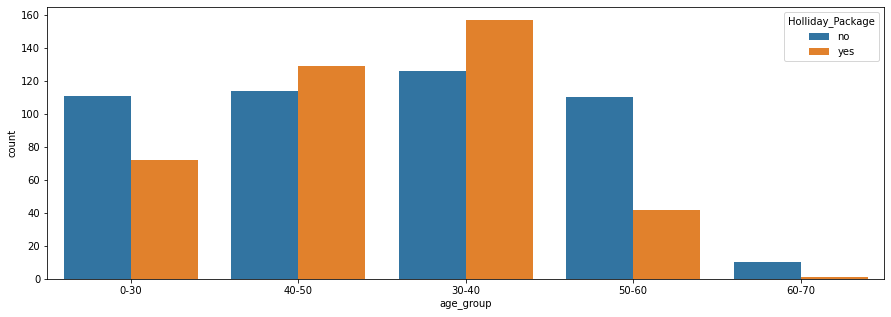

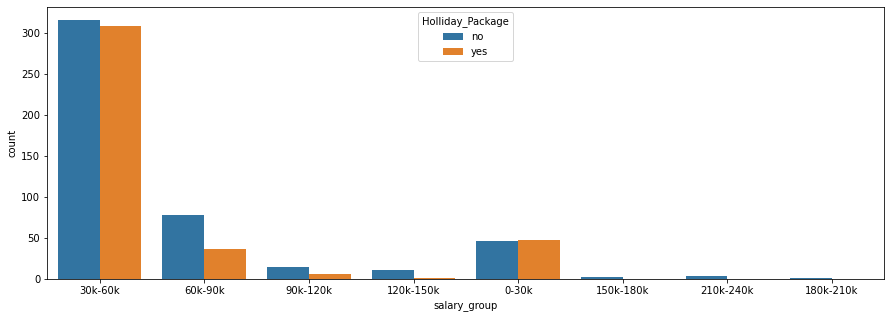

In [99]:
for i in ['age_group','salary_group']:
    plt.figure(figsize=[15,5])
    sns.countplot(data=holiday_package,x=i,hue='Holliday_Package')
    plt.show()

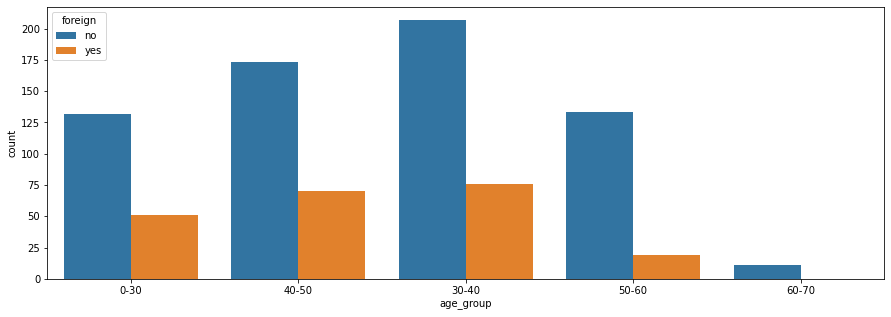

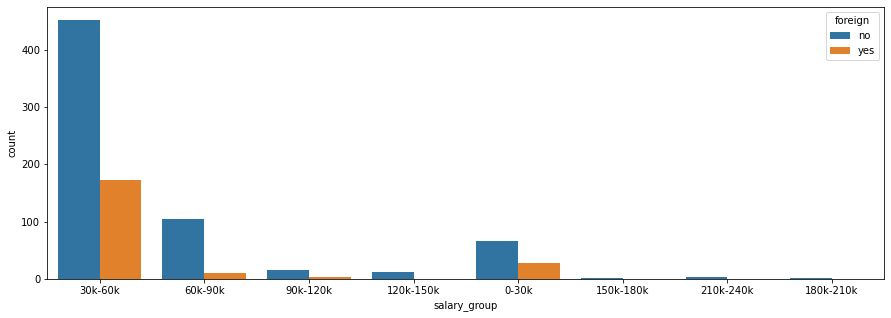

In [100]:
for i in ['age_group','salary_group']:
    plt.figure(figsize=[15,5])
    sns.countplot(data=holiday_package,x=i,hue='foreign')
    plt.show()

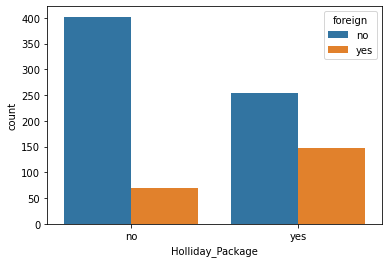

In [101]:
sns.countplot(data=holiday_package,x='Holliday_Package',hue='foreign');

_**Inference**_

---

The employees in the age of 30-40 earns around 30k to 60k. Employees with age 30 to 45+ opt for the holiday package where salary is maximum 60k. As most of the employees are not foreigner the focus should be for the employees who are native.

---


_Bivariate Analysis - Categorical and Numerical_

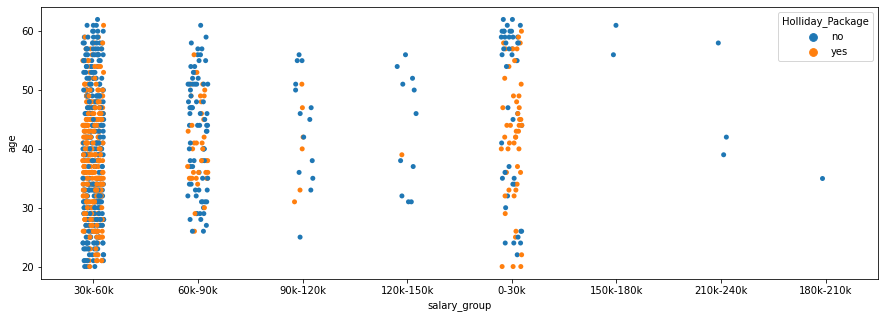

In [102]:
plt.figure(figsize=[15,5])
sns.stripplot(data=holiday_package,x='salary_group',y='age',hue='Holliday_Package')
plt.show()

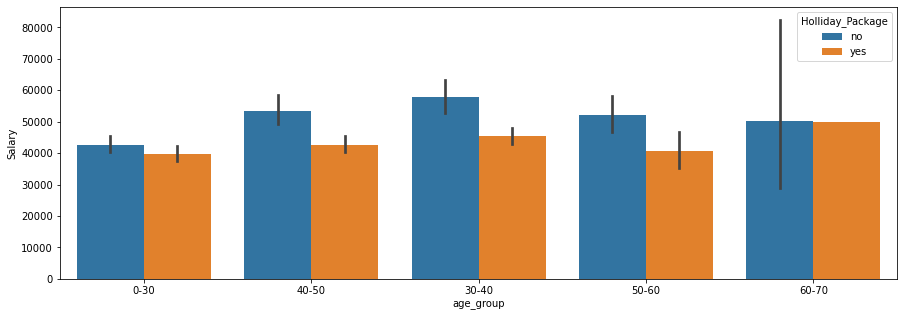

In [103]:
plt.figure(figsize=[15,5])
sns.barplot(data=holiday_package,x='age_group',y='Salary',hue='Holliday_Package')
plt.show()

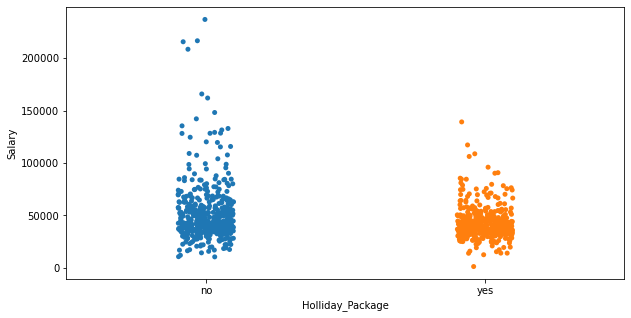

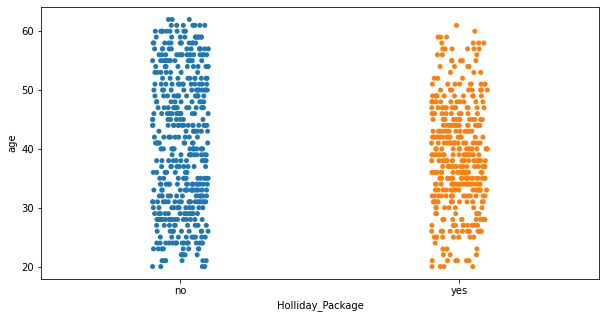

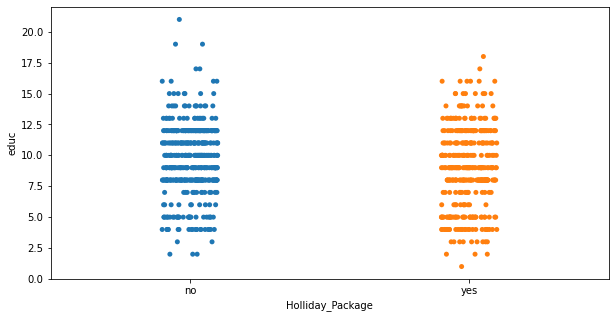

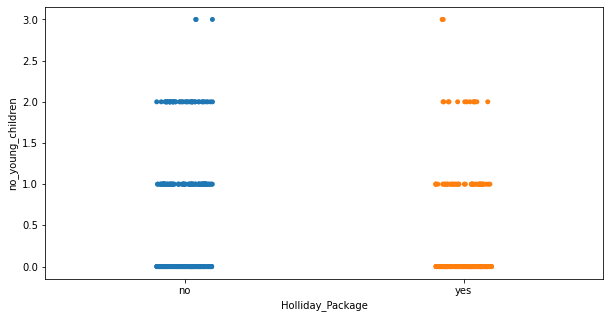

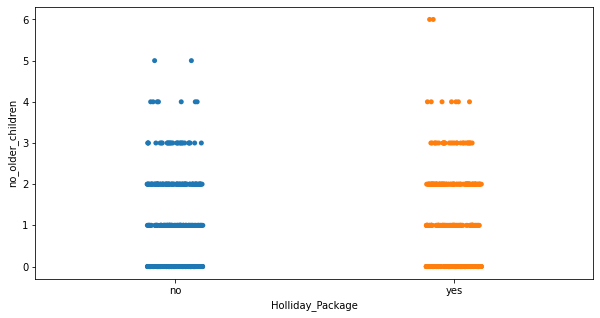

In [104]:
for i in numerical:    
    plt.figure(figsize=[10,5])
    sns.stripplot(data=holiday_package,x='Holliday_Package',y=i)
    plt.show()

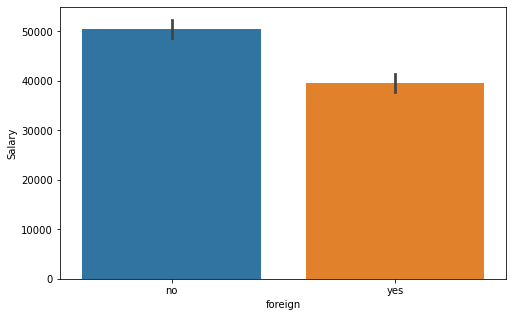

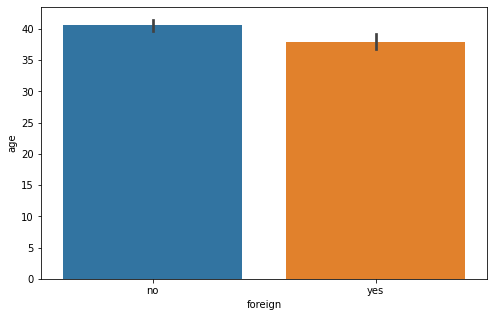

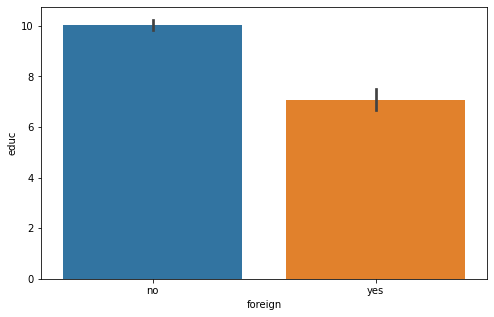

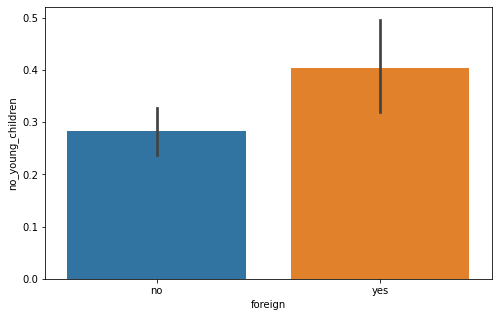

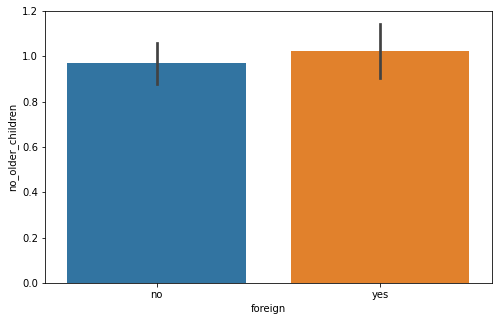

In [105]:
for i in numerical:    
    plt.figure(figsize=[8,5])
    sns.barplot(data=holiday_package,x='foreign',y=i)
    plt.show()

_**Inference**_

---

Employees in the age group of 30-45+ are more likely to opt for the holiday package as there is an increase in salary. Also, the education is an important factor as the salary increases with the education level and chances to opt for a holiday package also increases. Employees with higher no of younger children does not opt for the package.

---


_Multivariate Analysis_

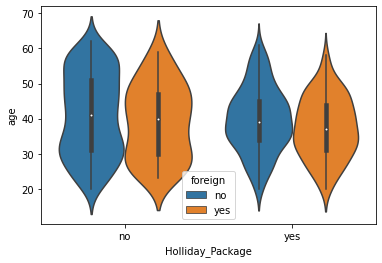

In [106]:
sns.violinplot(data=holiday_package,x='Holliday_Package',hue='foreign',y='age');

<AxesSubplot:xlabel='Holliday_Package', ylabel='educ'>

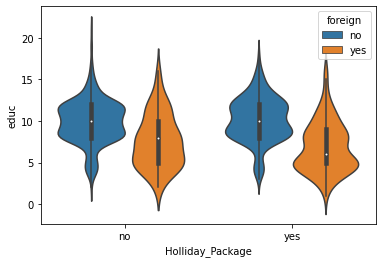

In [107]:
sns.violinplot(data=holiday_package,x='Holliday_Package',hue='foreign',y='educ')

<AxesSubplot:xlabel='Holliday_Package', ylabel='Salary'>

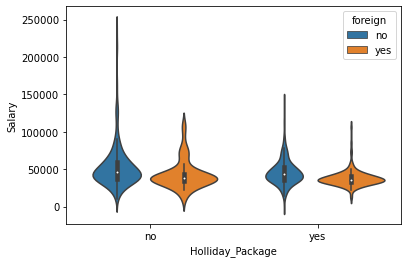

In [108]:
sns.violinplot(data=holiday_package,x='Holliday_Package',hue='foreign',y='Salary')

<AxesSubplot:xlabel='Holliday_Package', ylabel='no_young_children'>

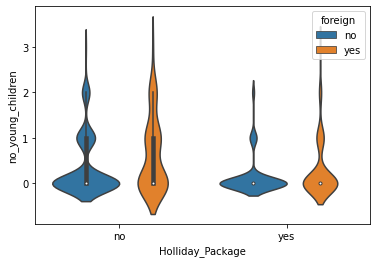

In [109]:
sns.violinplot(data=holiday_package,x='Holliday_Package',hue='foreign',y='no_young_children')

<AxesSubplot:xlabel='Holliday_Package', ylabel='no_older_children'>

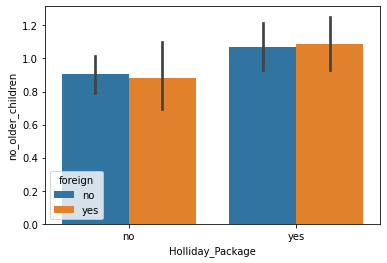

In [110]:
sns.barplot(data=holiday_package,x='Holliday_Package',hue='foreign',y='no_older_children')

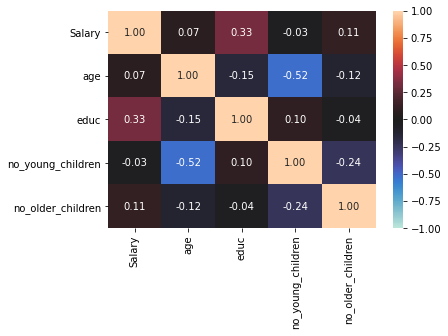

In [111]:
sns.heatmap(holiday_package.corr(),annot=True,fmt='.2f',vmin=-1,vmax=1,center=0);

_**Inference**_

---

Overall, there is no correlation between the variables. However, education and Salary shows a slight positive correlation whereas age and no young children shows a negative correlation.

---


### 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

In [112]:
from warnings import filterwarnings
filterwarnings('ignore')

_Encoding the categorical variables:_

In [113]:
holiday_package['salary_group'] = pd.Categorical(holiday_package['salary_group']).codes
holiday_package['age_group'] = pd.Categorical(holiday_package['age_group']).codes

In [114]:
holiday_package = pd.get_dummies(holiday_package,columns=['Holliday_Package','foreign'],drop_first=True)

holiday_package.head()

,Salary,age,educ,no_young_children,no_older_children,salary_group,age_group,Holliday_Package_yes,foreign_yes
0,48412,30,8,1,1,5,0,0,0
1,37207,45,8,0,1,5,2,1,0
2,58022,46,9,0,0,5,2,0,0
3,66503,31,11,2,0,6,1,0,0
4,66734,44,12,0,2,6,2,0,0


_Defining X and Y_

In [115]:
X = holiday_package.drop('Holliday_Package_yes',axis=1)
y = holiday_package['Holliday_Package_yes']


_Splitting the data into 70:30_

In [116]:
# Split X and y into training and test set in 70:30 ratio
# from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=42,stratify=y)

In [117]:
print('X_train data shape =',X_train.shape)
print('y_train data shape =',y_train.shape)
print('X_test data shape =',X_test.shape)
print('y_test data shape =',y_test.shape)

X_train data shape = (610, 8)
y_train data shape = (610,)
X_test data shape = (262, 8)
y_test data shape = (262,)


_**Logistic Regression**_

In [118]:
grid={'penalty':['l2','l1'],
      'solver':['liblinear','newton-cg'],
      'tol':[0.0001,0.00001],
     'max_iter':[10000,1000]}

In [119]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 10,scoring='f1',verbose=2)

In [120]:
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits
[CV] END max_iter=10000, penalty=l2, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END max_iter=10000, penalty=l2, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END max_iter=10000, penalty=l2, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END max_iter=10000, penalty=l2, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END max_iter=10000, penalty=l2, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END max_iter=10000, penalty=l2, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END max_iter=10000, penalty=l2, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END max_iter=10000, penalty=l2, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END max_iter=10000, penalty=l2, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END max_iter=10000, penalty=l2, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END max_iter=10000, penalty=l2, solver=liblinear, tol=1e-05; total time=

[CV] END max_iter=1000, penalty=l2, solver=liblinear, tol=1e-05; total time=   0.0s
[CV] END max_iter=1000, penalty=l2, solver=liblinear, tol=1e-05; total time=   0.0s
[CV] END max_iter=1000, penalty=l2, solver=liblinear, tol=1e-05; total time=   0.0s
[CV] END max_iter=1000, penalty=l2, solver=newton-cg, tol=0.0001; total time=   0.1s
[CV] END max_iter=1000, penalty=l2, solver=newton-cg, tol=0.0001; total time=   0.1s
[CV] END max_iter=1000, penalty=l2, solver=newton-cg, tol=0.0001; total time=   0.1s
[CV] END max_iter=1000, penalty=l2, solver=newton-cg, tol=0.0001; total time=   0.1s
[CV] END max_iter=1000, penalty=l2, solver=newton-cg, tol=0.0001; total time=   0.1s
[CV] END max_iter=1000, penalty=l2, solver=newton-cg, tol=0.0001; total time=   0.1s
[CV] END max_iter=1000, penalty=l2, solver=newton-cg, tol=0.0001; total time=   0.1s
[CV] END max_iter=1000, penalty=l2, solver=newton-cg, tol=0.0001; total time=   0.1s
[CV] END max_iter=1000, penalty=l2, solver=newton-cg, tol=0.0001; to

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'max_iter': [10000, 1000], 'penalty': ['l2', 'l1'],
                         'solver': ['liblinear', 'newton-cg'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1', verbose=2)

In [121]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 1e-05} 

LogisticRegression(max_iter=1000, penalty='l1', solver='liblinear', tol=1e-05)


In [122]:
LogitModel = grid_search.best_estimator_

In [123]:
LogitModel.fit(X_train,y_train)

LogisticRegression(max_iter=1000, penalty='l1', solver='liblinear', tol=1e-05)

In [124]:
ytrain_predict = LogitModel.predict(X_train)
ytest_predict = LogitModel.predict(X_test)

_Predicting probability for test_

In [125]:
ytest_predict_prob=LogitModel.predict_proba(X_test)
prob = pd.DataFrame(ytest_predict_prob)
prob.rename({0:'No',1:'Yes'},axis=1,inplace=True)
prob.head(10)

,No,Yes
0,0.2753,0.7247
1,0.8139,0.1861
2,0.5532,0.4468
3,0.6743,0.3257
4,0.2929,0.7071
5,0.6886,0.3114
6,0.7504,0.2496
7,0.9193,0.0807
8,0.4863,0.5137
9,0.4445,0.5555


In [126]:
Holiday_Package = []
for n,y in zip(prob['No'],prob['Yes']):
    if n > y:
        Holiday_Package.append('No')
    else:
        Holiday_Package.append('Yes')

In [127]:
prob['Holiday_Package'] = Holiday_Package
prob.tail()

,No,Yes,Holiday_Package
257,0.2597,0.7403,Yes
258,0.7081,0.2919,No
259,0.4775,0.5225,Yes
260,0.1742,0.8258,Yes
261,0.6143,0.3857,No


_**Linear Discriminant Analysis**_

In [128]:
#Build LDA Model and fit the data
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#Build LDA Model
LDA = LinearDiscriminantAnalysis(solver='eigen')
LDA_model=LDA.fit(X_train,y_train)

In [129]:
LDA_model

LinearDiscriminantAnalysis(solver='eigen')

In [130]:
# values = []
# for i in y_train.values:
#     for j in i:
#         values.append(j)

In [131]:
Disc_score = pd.DataFrame([LDA_model.transform(X_train).ravel(),y_train.values])
Disc_score = Disc_score.T
Disc_score.rename({0:'Discriminant_Score',1:'Holiday_Package'},axis=1,inplace=True)
Disc_score['Holiday_Package'].replace({0:'No',1:'Yes'},inplace=True)
# columns=['Discriminant_Score','Holiday_Package']
Disc_score.head()

,Discriminant_Score,Holiday_Package
0,2.8813,No
1,3.0398,No
2,2.2580,Yes
3,2.0668,Yes
4,2.6053,No


<AxesSubplot:xlabel='Holiday_Package', ylabel='Discriminant_Score'>

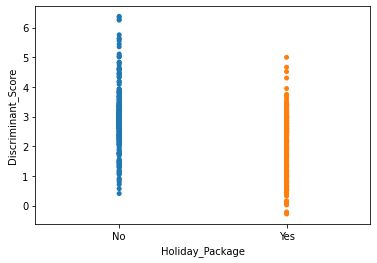

In [132]:
sns.stripplot(data=Disc_score,x='Holiday_Package',y='Discriminant_Score',jitter=False)

In [133]:
comp = pd.DataFrame({'Variable':list(X_train),'Component':list(LDA_model.coef_.ravel())})
comp

,Variable,Component
0,Salary,-0.0000
1,age,-0.0397
2,educ,0.0151
3,no_young_children,-1.2375
4,no_older_children,-0.0339
5,salary_group,0.0207
6,age_group,-0.0595
7,foreign_yes,1.3512


### 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

**Logistic Regression**

_**Performance Metrics**_

_Training data_

Logistic Regression > Train

Accuracy = 0.6836065573770492

AUC = 0.7239775443758181




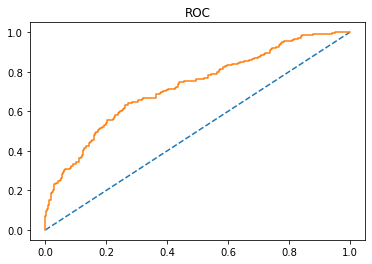

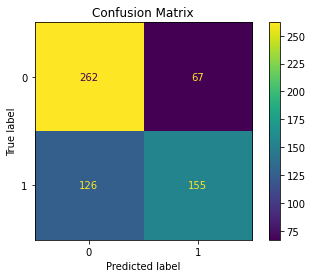

classification_report

              precision    recall  f1-score   support

           0       0.68      0.80      0.73       329
           1       0.70      0.55      0.62       281

    accuracy                           0.68       610
   macro avg       0.69      0.67      0.67       610
weighted avg       0.69      0.68      0.68       610

F1 Score = 0.6163021868787276

Pprecision_score = 0.6981981981981982

Recall_score = 0.5516014234875445

roc_auc_score = 0.6739770035370852


In [134]:
from sklearn.metrics import roc_auc_score, plot_confusion_matrix, confusion_matrix, roc_curve, classification_report,f1_score    
print(color.BOLD+color.BLUE+"Logistic Regression > Train"+color.END)
print('='*len('Logistic Regression > Train'))
print()
# Accuracy - Training Data
print(color.BOLD+color.RED+'Accuracy ='+color.END,LogitModel.score(X_train, y_train))
print()
# predict probabilities
probs = LogitModel.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
auc = roc_auc_score(y_train, probs)
print(color.BOLD+color.RED+'AUC ='+color.END,auc)
print()
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
# print(color.BOLD+color.RED+'ROC > Logistic Regression > Train'+color.END)
print()
plt.plot(train_fpr, train_tpr)
plt.title('ROC')
plt.show()

confusion_matrix(y_train, ytrain_predict)
plot_confusion_matrix(LogitModel,X_train,y_train)
plt.title('Confusion Matrix')
plt.show()
print(color.BOLD+color.RED+'classification_report'+color.END)
print()
print(classification_report(y_train, ytrain_predict))
print(color.BOLD+color.RED+'F1 Score ='+color.END,f1_score(y_train,LogitModel.predict(X_train)))
print()
print(color.BOLD+color.RED+'Pprecision_score ='+color.END,metrics.precision_score(y_train,LogitModel.predict(X_train)))
print()
print(color.BOLD+color.RED+'Recall_score ='+color.END,metrics.recall_score(y_train,LogitModel.predict(X_train)))
print()
print(color.BOLD+color.RED+'roc_auc_score ='+color.END,metrics.roc_auc_score(y_train,LogitModel.predict(X_train)))


_Testing data_

Logistic Regression > Test

Accuracy = 0.6717557251908397

AUC = 0.7395539906103284




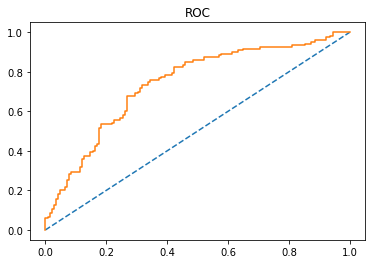

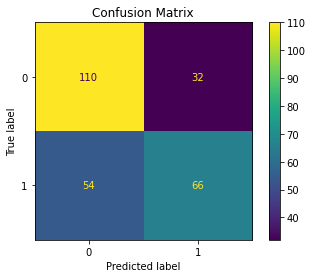

classification_report

              precision    recall  f1-score   support

           0       0.67      0.77      0.72       142
           1       0.67      0.55      0.61       120

    accuracy                           0.67       262
   macro avg       0.67      0.66      0.66       262
weighted avg       0.67      0.67      0.67       262

F1 Score = 0.6055045871559633

Precision_score = 0.673469387755102

Recall_score = 0.55

roc_auc_score = 0.6623239436619719



In [135]:
# from sklearn.metrics import roc_auc_score, plot_confusion_matrix, confusion_matrix, roc_curve, classification_report,f1_score    
print(color.BOLD+color.BLUE+"Logistic Regression > Test"+color.END)
print('='*len('Logistic Regression > Test'))
print()
# Accuracy - Test Data
print(color.BOLD+color.RED+'Accuracy ='+color.END,LogitModel.score(X_test, y_test))
print()
# predict probabilities
probs = LogitModel.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

# calculate AUC
auc = roc_auc_score(y_test, probs)
print(color.BOLD+color.RED+'AUC ='+color.END,auc)
print()
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
# print(color.BOLD+color.RED+'ROC > Logistic Regression > Train'+color.END)
print()
plt.plot(train_fpr, train_tpr)
plt.title('ROC')
plt.show()

confusion_matrix(y_test, ytest_predict)
plot_confusion_matrix(LogitModel,X_test,y_test)
plt.title('Confusion Matrix')
plt.show()
print(color.BOLD+color.RED+'classification_report'+color.END)
print()
print(classification_report(y_test, ytest_predict))
print(color.BOLD+color.RED+'F1 Score ='+color.END,f1_score(y_test,LogitModel.predict(X_test)))
print()
print(color.BOLD+color.RED+'Precision_score ='+color.END,metrics.precision_score(y_test,LogitModel.predict(X_test)))
print()
print(color.BOLD+color.RED+'Recall_score ='+color.END,metrics.recall_score(y_test,LogitModel.predict(X_test)))
print()
print(color.BOLD+color.RED+'roc_auc_score ='+color.END,metrics.roc_auc_score(y_test,LogitModel.predict(X_test)))
print()


**LinearDiscriminantAnalysis**

_**Performance Metrics**_

_Training data_

In [136]:
# Training Data Probability Prediction
pred_prob_train = LDA_model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = LDA_model.predict_proba(X_test)

In [137]:
# Predict it
from sklearn import metrics
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = LDA_model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = LDA_model.predict(X_test)

metrics.confusion_matrix(y_train,pred_class_train)

array([[257,  72],
       [135, 146]], dtype=int64)

In [138]:
tn,fp,fn,tp=metrics.confusion_matrix(y_train,pred_class_train).ravel()
print('Confusion Martix - Train')
print('=========================')
print('True Negative:',tn,'\n''False Positive:',fp,'\n''False Negative:',fn,'\n','True Positive:',tp)


Confusion Martix - Train
True Negative: 257 
False Positive: 72 
False Negative: 135 
 True Positive: 146


In [139]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.66      0.78      0.71       329
           1       0.67      0.52      0.59       281

    accuracy                           0.66       610
   macro avg       0.66      0.65      0.65       610
weighted avg       0.66      0.66      0.65       610
 



In [140]:
Accuracy_train = LDA_model.score(X_train,y_train)
print('Accuracy_train = ',Accuracy_train)

Accuracy_train =  0.660655737704918


In [141]:
print('Confusion Martix - Test')
print('=========================')

tn,fp,fn,tp=metrics.confusion_matrix(y_test,pred_class_test).ravel()
print('True Negative:',tn,'\n''False Positive:',fp,'\n''False Negative:',fn,'\n','True Positive:',tp)


Confusion Martix - Test
True Negative: 109 
False Positive: 33 
False Negative: 54 
 True Positive: 66


In [142]:
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.67      0.77      0.71       142
           1       0.67      0.55      0.60       120

    accuracy                           0.67       262
   macro avg       0.67      0.66      0.66       262
weighted avg       0.67      0.67      0.66       262
 



In [143]:
Accuracy_test = LDA_model.score(X_test,y_test)
print('Accuracy_test = ', Accuracy_test)

Accuracy_test =  0.6679389312977099


AUC for the Training Data: 0.727


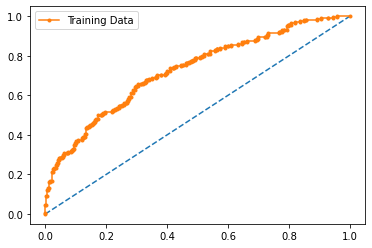

In [144]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')

plt.legend(loc='best')
plt.show()

AUC for the Test Data: 0.743


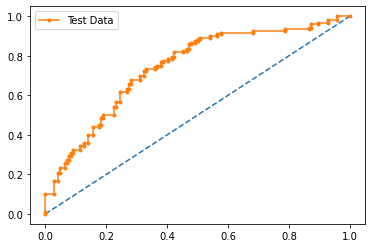

In [145]:
# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

AUC for the Training Data: 0.727
AUC for the Test Data: 0.743


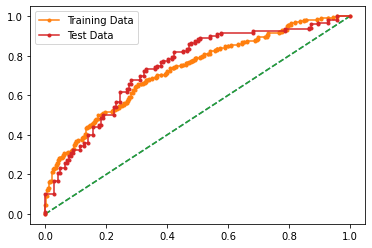

In [146]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

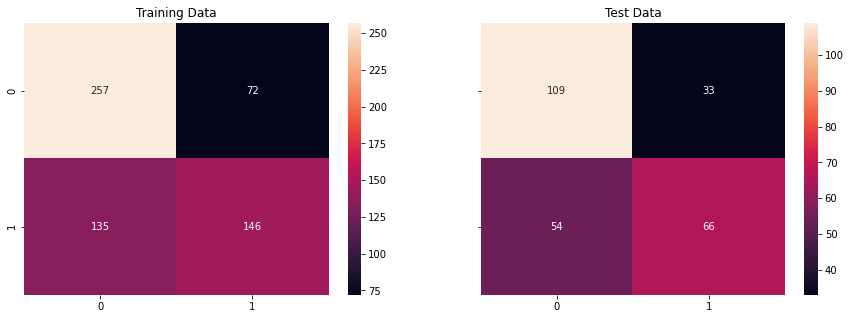

In [147]:
# Evaluation
f,a =  plt.subplots(1,2,figsize=[15,5],sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',ax=a[0][1]);
a[0][1].set_title('Test Data');





In [148]:
y_prob = LDA_model.predict_proba(X_train)[:,1]
y_prob
y_pred_prob = pd.DataFrame(y_prob,columns= ['Probabilities'])
y_pred_prob.head()
y_pred_prob['cutoff_5'] = y_pred_prob['Probabilities'].apply(lambda x : 1 if x>=0.5 else 0)
y_pred_prob['cutoff_7'] = y_pred_prob['Probabilities'].apply(lambda x : 1 if x>=0.7 else 0)
y_pred_prob.head()

,Probabilities,cutoff_5,cutoff_7
0,0.3804,0,0
1,0.3483,0,0
2,0.5144,1,0
3,0.5560,1,0
4,0.4387,0,0


In [149]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(y_train)):#defining a loop for the length of the train data
        if np.array(pred_prob_train[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print('Cutoff:',round(j,3),'\t','Accuracy Score',round(metrics.accuracy_score(y_train,custom_cutoff_data),4),
                                    'F1 Score',round(metrics.f1_score(y_train,custom_cutoff_data),4),
                                      'Precision',round(metrics.precision_score(y_train,custom_cutoff_data),4),
                                        'recall',round(metrics.recall_score(y_train,custom_cutoff_data),4)
         )

Cutoff: 0.1 	 Accuracy Score 0.4836 F1 Score 0.64 Precision 0.4714 recall 0.9964
Cutoff: 0.2 	 Accuracy Score 0.5148 F1 Score 0.6509 Precision 0.4868 recall 0.9822
Cutoff: 0.3 	 Accuracy Score 0.5656 F1 Score 0.6581 Precision 0.5162 recall 0.9075
Cutoff: 0.4 	 Accuracy Score 0.6557 F1 Score 0.6624 Precision 0.6041 recall 0.7331
Cutoff: 0.5 	 Accuracy Score 0.6607 F1 Score 0.5852 Precision 0.6697 recall 0.5196
Cutoff: 0.6 	 Accuracy Score 0.6508 F1 Score 0.5058 Precision 0.7267 recall 0.3879
Cutoff: 0.7 	 Accuracy Score 0.6426 F1 Score 0.4293 Precision 0.8119 recall 0.2918
Cutoff: 0.8 	 Accuracy Score 0.5918 F1 Score 0.2194 Precision 0.9211 recall 0.1246
Cutoff: 0.9 	 Accuracy Score 0.5443 F1 Score 0.0211 Precision 1.0 recall 0.0107


In [150]:
#Predicting the classes on the test data

data_pred_custom_cutoff=[]
for i in range(0,len(pred_prob_test[:,1])):
    if np.array(pred_prob_test[:,1])[i]>0.4:
        a=1
    else:
        a=0
    data_pred_custom_cutoff.append(a)

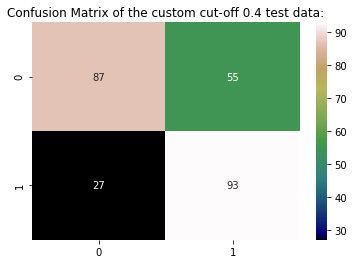

In [151]:
sns.heatmap((metrics.confusion_matrix(y_test,data_pred_custom_cutoff)),annot=True,fmt='.5g',cmap='gist_earth')
plt.title('Confusion Matrix of the custom cut-off 0.4 test data:');

In [152]:
print('Classification Report of the default cut-off test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n\n\n')
print('Classification Report of the custom cut-off 0.4 test data:\n\n',metrics.classification_report(y_test,data_pred_custom_cutoff),'\n')

Classification Report of the default cut-off test data:

               precision    recall  f1-score   support

           0       0.67      0.77      0.71       142
           1       0.67      0.55      0.60       120

    accuracy                           0.67       262
   macro avg       0.67      0.66      0.66       262
weighted avg       0.67      0.67      0.66       262
 



Classification Report of the custom cut-off 0.4 test data:

               precision    recall  f1-score   support

           0       0.76      0.61      0.68       142
           1       0.63      0.78      0.69       120

    accuracy                           0.69       262
   macro avg       0.70      0.69      0.69       262
weighted avg       0.70      0.69      0.69       262
 



In [153]:
#Predicting the classes on the test data

data_pred_custom_train=[]
for i in range(0,len(pred_prob_train[:,1])):
    if np.array(pred_prob_train[:,1])[i]>0.4:
        a=1
    else:
        a=0
    data_pred_custom_train.append(a)

LinearDiscriminantAnalysis > Train

Accuracy = 0.6557377049180327

AUC = 0.7266168373914267


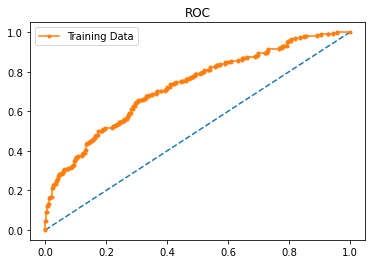

Classification Report of the custom cut-off 0.4:

               precision    recall  f1-score   support

           0       0.72      0.59      0.65       329
           1       0.60      0.73      0.66       281

    accuracy                           0.66       610
   macro avg       0.66      0.66      0.66       610
weighted avg       0.67      0.66      0.66       610
 


f1_score 0.662379421221865

precision_score 0.6041055718475073

recall_score 0.7330960854092526

roc_auc_score 0.6613808694523468


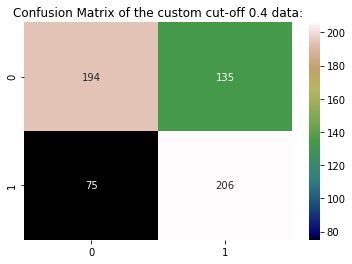

In [154]:
print(color.BLUE+color.BOLD+'LinearDiscriminantAnalysis > Train'+color.END)
print('===================================')
print()
print(color.BOLD+color.RED+'Accuracy ='+color.END,metrics.accuracy_score(y_train,data_pred_custom_train))
print()
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print(color.BOLD+color.RED+'AUC ='+color.END,auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')
plt.title('ROC')
plt.legend(loc='best')
plt.show()
#confusion
sns.heatmap((metrics.confusion_matrix(y_train,data_pred_custom_train)),annot=True,fmt='.5g',cmap='gist_earth')
plt.title('Confusion Matrix of the custom cut-off 0.4 data:');

print(color.BOLD+color.RED+'Classification Report of the custom cut-off 0.4:\n\n'+color.END,metrics.classification_report(y_train,data_pred_custom_train),'\n')
print()
print(color.BOLD+color.RED+'f1_score'+color.END,metrics.f1_score(y_train,data_pred_custom_train))
print()
print(color.BOLD+color.RED+'precision_score'+color.END,metrics.precision_score(y_train,data_pred_custom_train))
print()
print(color.BOLD+color.RED+'recall_score'+color.END,metrics.recall_score(y_train,data_pred_custom_train))
print()
print(color.BOLD+color.RED+'roc_auc_score'+color.END,metrics.roc_auc_score(y_train,data_pred_custom_train))

LinearDiscriminantAnalysis > Test

Accuracy =  0.6870229007633588

AUC = 0.743075117370892


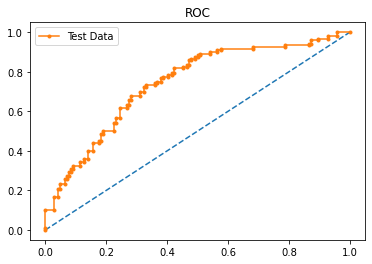

Classification Report of the custom cut-off 0.4:

               precision    recall  f1-score   support

           0       0.76      0.61      0.68       142
           1       0.63      0.78      0.69       120

    accuracy                           0.69       262
   macro avg       0.70      0.69      0.69       262
weighted avg       0.70      0.69      0.69       262
 


f1_score 0.6940298507462687

precision_score 0.6283783783783784

recall_score 0.775

roc_auc_score 0.6938380281690142


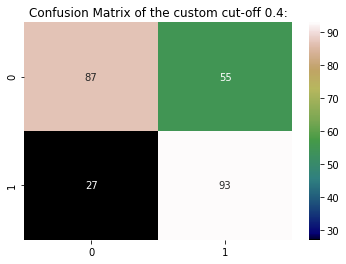

In [155]:
print(color.BOLD+color.BLUE+'LinearDiscriminantAnalysis > Test'+color.END)
print('===================================')
print()
print(color.BOLD+color.RED+'Accuracy = '+color.END,metrics.accuracy_score(y_test,data_pred_custom_cutoff))
print()
# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print(color.BOLD+color.RED+'AUC ='+color.END,  auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.title('ROC')
plt.legend(loc='best')
plt.show()
sns.heatmap((metrics.confusion_matrix(y_test,data_pred_custom_cutoff)),annot=True,fmt='.5g',cmap='gist_earth')
plt.title('Confusion Matrix of the custom cut-off 0.4:');

print(color.BOLD+color.RED+'Classification Report of the custom cut-off 0.4:\n\n'+color.END,metrics.classification_report(y_test,data_pred_custom_cutoff),'\n')
print()
print(color.BOLD+color.RED+'f1_score'+color.END,metrics.f1_score(y_test,data_pred_custom_cutoff))
print()
print(color.BOLD+color.RED+'precision_score'+color.END,metrics.precision_score(y_test,data_pred_custom_cutoff))
print()
print(color.BOLD+color.RED+'recall_score'+color.END,metrics.recall_score(y_test,data_pred_custom_cutoff))
print()
print(color.BOLD+color.RED+'roc_auc_score'+color.END,metrics.roc_auc_score(y_test,data_pred_custom_cutoff))

_Comparing both LogisticRegression and LinearDiscriminantAnalysis model_

**Train Data**

|Model|Accuracy|F1 Score|Precision|Recall|ROC_AUC Score|
|-----|-----|-----|-----|-----|-----|
|Logistic Regression|0.6721|0.6016|0.6833|0.5374|0.6623|
|Linear Discriminant Analysis|0.6557|0.6624|0.6041|0.7331|0.6614|



---
**Test Data**

|Model|Accuracy|F1 Score|Precision|Recall|ROC_AUC Score|
|-----|-----|-----|-----|-----|-----|
|Logistic Regression|0.6718|0.6091|0.67|0.5583|0.6623|
|Linear Discriminant Analysis|0.687|0.694|0.6284|0.775|0.6938|

Accuracy –How accurately / cleanly does the model classify the data points. Lesser the false predictions, more the accuracy

Accuracy = (TP + TN) / (TP+TN+FP+FN)

Recall - How many of the actual True data points are identified as True data points by the model. False Negatives are those data points which should have been identified as True.

Recall = TP/TP+FN

Precision –Among the points identified as Positive by the model, how many are really Positive
Precision = TP/TP+FP

F1-Score – The F-score is a way of combining the precision and recall of the model, and it is defined as the harmonic mean of the model's precision and recall.

F1-Score = precision * recall / precision + recall

ROC_AUC Score – The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.

Based on all the evaluation metrics, Logistic Regression model does have a high accuracy (0.6718) however has lower f1 score and recall. Precision for train data is 0.6833 and for test is 0.67 and recall for train data is 0.5374 and test is 0.5583.

When we evaluate the Linear Discriminant Analysis model, even though the accuracy (0.687) is marginally less than Logistic Regression the f1-score is high in both train (0. 6624) and test data (0.694). The recall and precision are also better than the logistic regression model with recall at 0.7331 in train data and 0.775 in test data and precision as 0.6014 in train data and 0.6284 in test.

The ROC_AUC score for Linear Discriminant Analysis model is 0.6614 in train and 0. 6938 in test.

Concluding that Linear Discriminant Analysis model is a far superior model in terms of quality that Logistic Regression model for this particular case study.


### 2.4 Inference: Basis on these predictions, what are the insights and recommendations.
<!-- Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present. -->

Based on the analysis, employees who are
between the age group of 30 to 50 are the
ones that opt for the holiday package. Also, the
employees with no young children or 0 or at
most 1 older child prefer the holiday package.
It can also be seen that the employees with
number of education years below 10 are
more likely to plan holidays as their age will be
most likely fall in 30 to 50 age group.

<h4 align=center><font size = 5>~END~</font></h4>